

```
Assignment 1
Name: Sagar Nandeshwar
Student ID: 260920948
```



Import Statement

In [834]:
import numpy as np
from scipy.stats import bernoulli
import random
import matplotlib.pyplot as plt
import math
from scipy.stats import beta

**PLEASE NOTE: the codes, graphs and comments are all in this notebook. I have also added nodes for better clarification text**


**Discription of the colour of lines in graph is given as comments**



 **standard deviation plots are at the end of respective question**

```
The arm 0 represnt the arm with p = 0.5
The arm 1 represnt the arm with p = 0.5 - delta
The arm 2 represnt the arm with p = 0.5 - (2 * delta)
```


# **Question 1**

In [835]:
def sample(arm):
  delta = 0.1
  if arm == 0:
    p = 0.5 
  if arm == 1:
    p = 0.5 - delta
  if arm == 2:
    p = 0.5 - (2 * delta) 
  return np.random.binomial(1, p)

def Bernoulli_simulator(arm, n_samples):
  sample_array = []
  for i in range(n_samples):
    reward = sample(arm)
    sample_array.append(reward)
  return sample_array

In [836]:
# For arm with p = 0.5
q1_sample_arm_0 = Bernoulli_simulator(0, 50)
# For arm with p = 0.5 - alpha
q1_sample_arm_1 = Bernoulli_simulator(1, 50)
# For arm with p = 0.5 - (2 * alpha) 
q1_sample_arm_2 = Bernoulli_simulator(2, 50)



```
The blue line represent the true value
The green line represent the estimated value
The red dot resent the reward point
```



For arm 0 (i.e. p = 0.5)

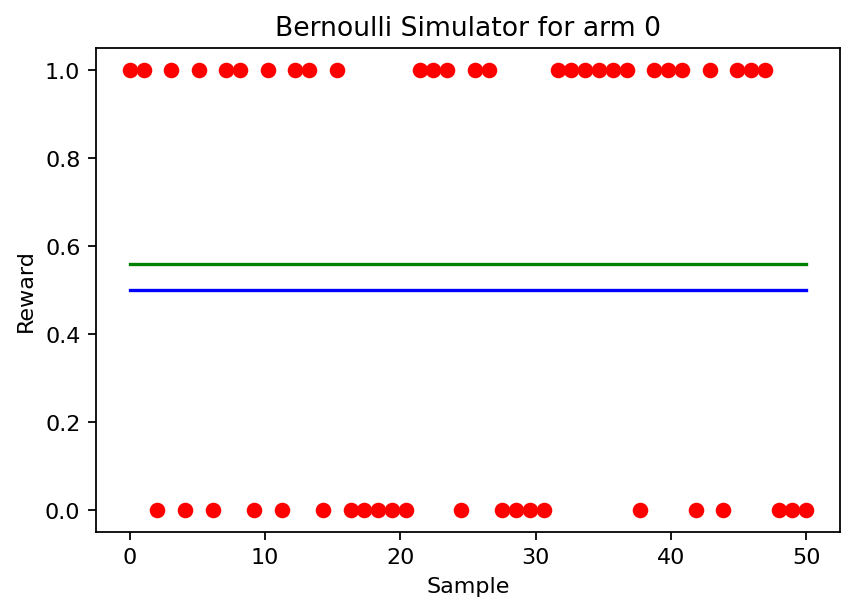

In [837]:
t = np.linspace(0, 50, 50)
q1_sample_arm_0_tureValue = np.full(50,0.5)
q1_sample_arm_0_mean = np.full(50, np.mean(q1_sample_arm_0))

plt.figure(dpi=160)
plt.plot(t, q1_sample_arm_0, 'ro', t, q1_sample_arm_0_tureValue, 'b', t, q1_sample_arm_0_mean,'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Bernoulli Simulator for arm 0')
plt.show()

For arm 1 (i.e. p = 0.4)

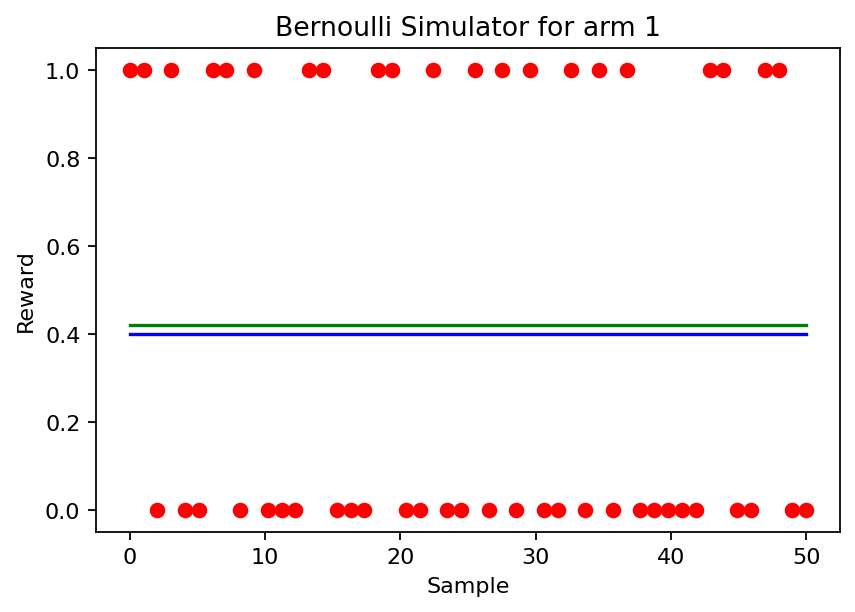

In [838]:
t = np.linspace(0, 50, 50)
q1_sample_arm_1_tureValue = np.full(50,0.4)
q1_sample_arm_1_mean = np.full(50, np.mean(q1_sample_arm_1))

plt.figure(dpi=160)
plt.plot(t, q1_sample_arm_1, 'ro', t, q1_sample_arm_1_tureValue, 'b', t, q1_sample_arm_1_mean,'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Bernoulli Simulator for arm 1')
plt.show()

For arm 2 (i.e. p = 0.3)

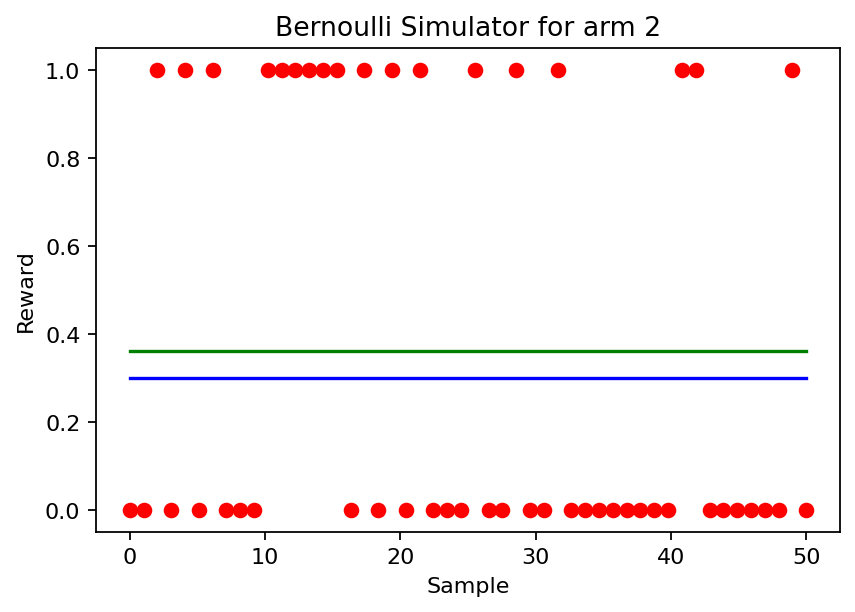

In [839]:
t = np.linspace(0, 50, 50)
q1_sample_arm_2_tureValue = np.full(50,0.3)
q1_sample_arm_2_mean = np.full(50, np.mean(q1_sample_arm_2))

plt.figure(dpi=160)
plt.plot(t, q1_sample_arm_2, 'ro', t, q1_sample_arm_2_tureValue, 'b', t, q1_sample_arm_2_mean,'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Bernoulli Simulator for arm 2')
plt.show()

# **Question 2**



```
Alpha 1 -> alpha = 0.1 show with Red line
Alpha 2 -> alpha = 0.01 show with Blue line
ang -> averaging show with Green line
```



In [840]:
def q2_update(alpha, sample_d, arm):

  # Initial optimal value
  if arm == -1:
    q = 0
  elif arm == 0:
    q = 0.5
  elif arm == 1:
    q = 0.4
  else:
    q = 0.3
    
  result_array = []
  for num in sample_d:
    q = q + alpha * (num - q)
    result_array.append(q)
  return result_array

def q2_updateAvg(sample_d, arm):
  if arm == -1:
    q = 0
  elif arm == 0:
    q = 0.5
  elif arm == 1:
    q = 0.4
  else:
    q = 0.3
  result_array = []
  index = 1
  for num in sample_d:
    alpha = 1 / index
    q = q + alpha * (num - q)
    result_array.append(q)
    index = index + 1
  return result_array

**I performed update and updateavg with intial action value 0 AND optimal action value (0.5, 0.4 and 0.3)**

```
The Red line represent alpha = 0.1
The Blue line represent alpha = 0.01
The Green line represent averaging
```

For arm 0 with q0 = 0.5 



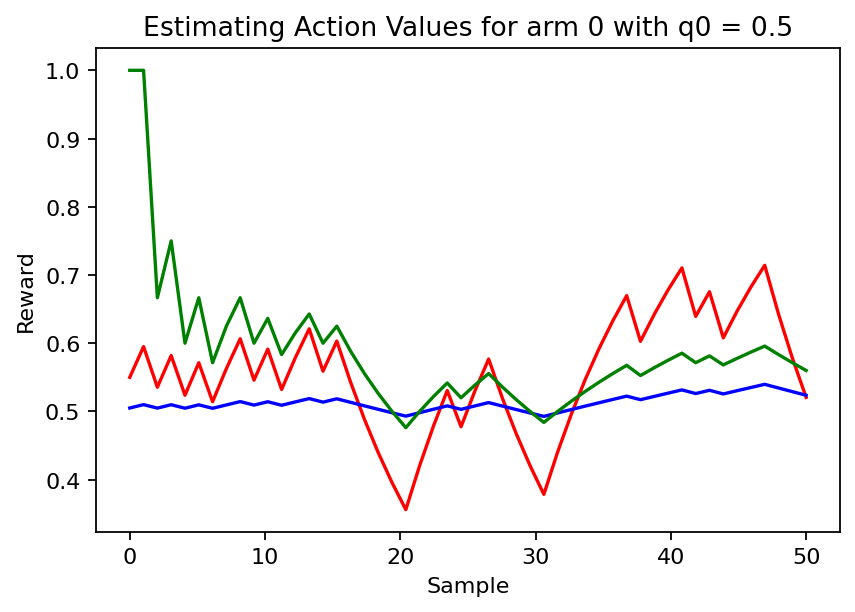

In [841]:
q2_arm_0_alpha_1 = q2_update(0.1, q1_sample_arm_0, 0)
q2_arm_0_alpha_2 = q2_update(0.01, q1_sample_arm_0, 0)
q2_arm_0_avg = q2_updateAvg(q1_sample_arm_0, 0)


t = np.linspace(0, 50, 50)

plt.figure(dpi=160)
plt.plot(t, q2_arm_0_alpha_1, 'r')
plt.plot(t, q2_arm_0_alpha_2, 'b')
plt.plot(t, q2_arm_0_avg, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Estimating Action Values for arm 0 with q0 = 0.5')
plt.show()

For arm 1 with q0 = 0.4

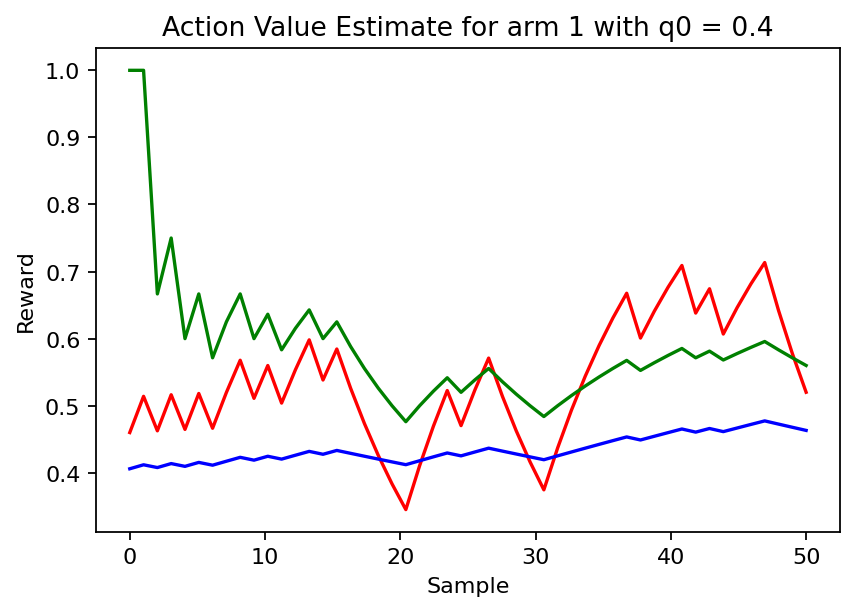

In [842]:
q2_arm_1_alpha_1 = q2_update(0.1, q1_sample_arm_0, 1)
q2_arm_1_alpha_2 = q2_update(0.01, q1_sample_arm_0, 1)
q2_arm_1_avg = q2_updateAvg(q1_sample_arm_0, 1)


t = np.linspace(0, 50, 50)

plt.figure(dpi=160)
plt.plot(t, q2_arm_1_alpha_1, 'r')
plt.plot(t, q2_arm_1_alpha_2, 'b')
plt.plot(t, q2_arm_1_avg, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 1 with q0 = 0.4')
plt.show()

For arm 2 with q0 = 0.3

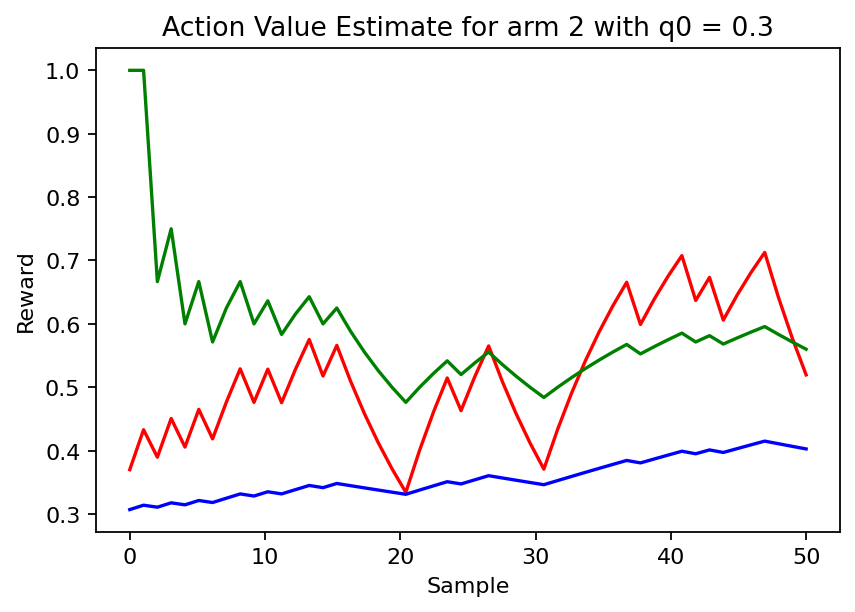

In [843]:
q2_arm_2_alpha_1 = q2_update(0.1, q1_sample_arm_0, 2)
q2_arm_2_alpha_2 = q2_update(0.01, q1_sample_arm_0, 2)
q2_arm_2_avg = q2_updateAvg(q1_sample_arm_0, 2)


t = np.linspace(0, 50, 50)

plt.figure(dpi=160)
plt.plot(t, q2_arm_2_alpha_1, 'r')
plt.plot(t, q2_arm_2_alpha_2, 'b')
plt.plot(t, q2_arm_2_avg, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 2 with q0 = 0.3')
plt.show()

For arm 0 with q0 = 0

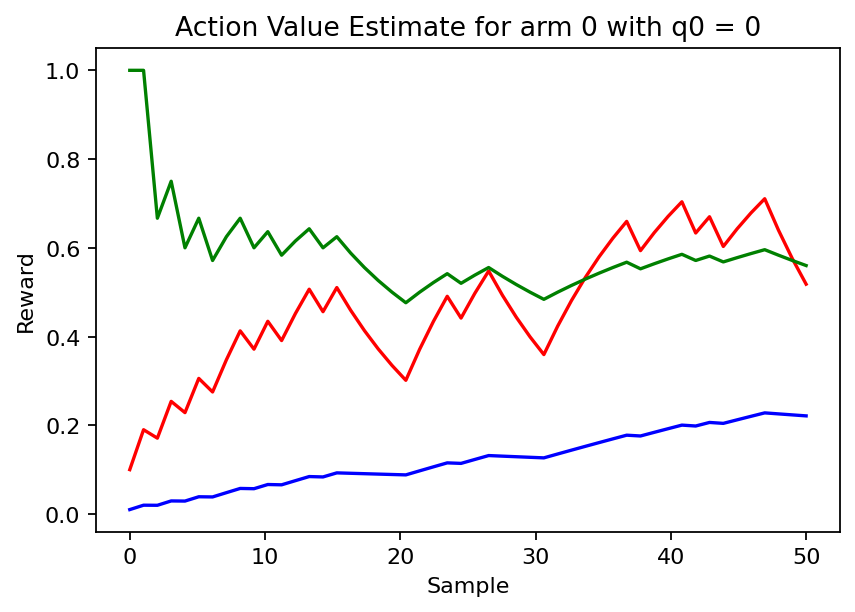

In [844]:
q2_arm_0_alpha_1_0 = q2_update(0.1, q1_sample_arm_0, -1)
q2_arm_0_alpha_2_0 = q2_update(0.01, q1_sample_arm_0, -1)
q2_arm_0_avg_0 = q2_updateAvg(q1_sample_arm_0, -1)


t = np.linspace(0, 50, 50)

plt.figure(dpi=160)
plt.plot(t, q2_arm_0_alpha_1_0, 'r')
plt.plot(t, q2_arm_0_alpha_2_0, 'b')
plt.plot(t, q2_arm_0_avg_0, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 0 with q0 = 0')
plt.show()

For arm 1 with q0 = 0

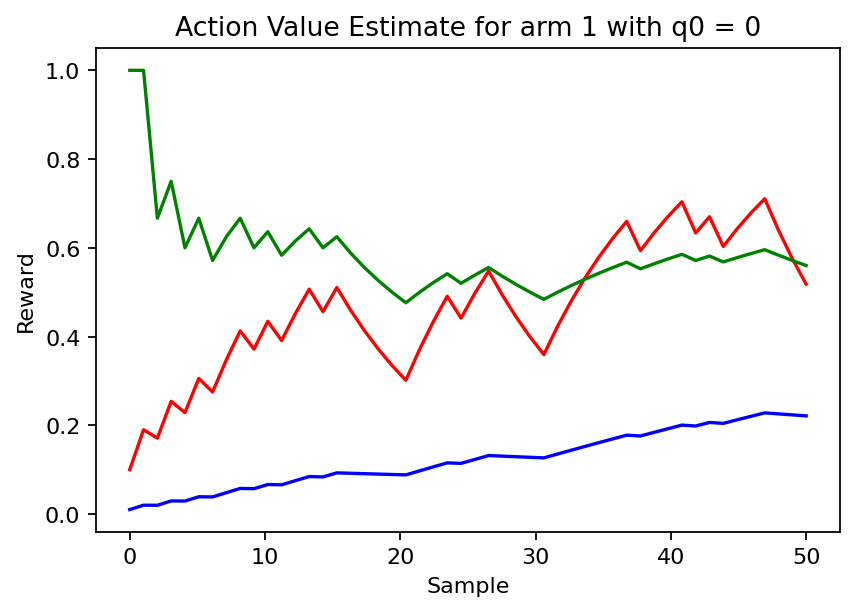

In [845]:
q2_arm_1_alpha_1_0 = q2_update(0.1, q1_sample_arm_0, -1)
q2_arm_1_alpha_2_0 = q2_update(0.01, q1_sample_arm_0, -1)
q2_arm_1_avg_0 = q2_updateAvg(q1_sample_arm_0, -1)


t = np.linspace(0, 50, 50)

plt.figure(dpi=160)
plt.plot(t, q2_arm_1_alpha_1_0, 'r')
plt.plot(t, q2_arm_1_alpha_2_0, 'b')
plt.plot(t, q2_arm_1_avg_0, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 1 with q0 = 0')
plt.show()

For arm 2 with q0 = 0

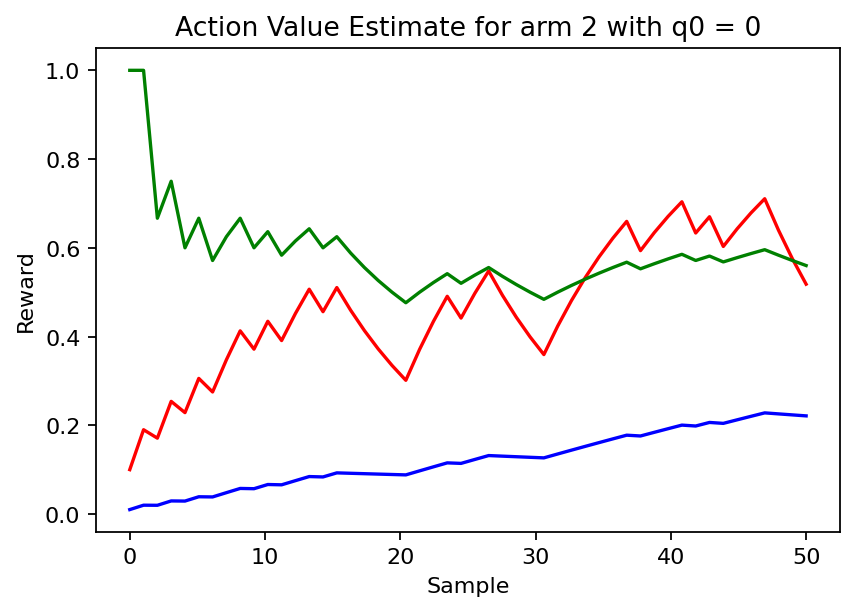

In [846]:
q2_arm_2_alpha_1_0 = q2_update(0.1, q1_sample_arm_0, -1)
q2_arm_2_alpha_2_0 = q2_update(0.01, q1_sample_arm_0, -1)
q2_arm_2_avg_0 = q2_updateAvg(q1_sample_arm_0, -1)


t = np.linspace(0, 50, 50)

plt.figure(dpi=160)
plt.plot(t, q2_arm_2_alpha_1_0, 'r')
plt.plot(t, q2_arm_2_alpha_2_0, 'b')
plt.plot(t, q2_arm_2_avg_0, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 2 with q0 = 0')
plt.show()

# **Question 3**

```
Alpha 1 -> alpha = 0.1 show with Red line
Alpha 2 -> alpha = 0.01 show with Blue line
ang -> averaging show with Green line
```

Functions

In [847]:
def question_3(arm):
  result_sample = []
  for i in range(100):
    sample = Bernoulli_simulator(arm, 100)
    result_sample.append(sample)
  return result_sample

def q3_calculate_avg(arr):
  result = [] 
  for y in range(100):
    average = []
    for x in range(100):
      average.append(arr[x][y])
    result.append(np.mean(average))
  return result

def q3_calculate_std(arr):
  sd = []
  for y in range(100):
    average = []
    for x in range(100):
      average.append(arr[x][y])
    sd.append(np.std(average))
  return sd
  
def q3_make_sd_points(reward, sd):
  lower = []
  upper = []
  index = 0
  for num in reward:
    full = sd[index]
    half = full / 2
    lower.append(num - half)
    upper.append(num + half)
    index = index + 1
  return lower, upper

Dataset

In [848]:
q3_sample_arm_0 = question_3(0)
q3_sample_arm_1 = question_3(1)
q3_sample_arm_2 = question_3(2)

Averaging

In [849]:
q3_reward_avg_0 = q3_calculate_avg(q3_sample_arm_0)
q3_reward_avg_1 = q3_calculate_avg(q3_sample_arm_1)
q3_reward_avg_2 = q3_calculate_avg(q3_sample_arm_2)

```
The Red line represent alpha = 0.1
The Blue line represent alpha = 0.01
The Green line represent averaging
```

For amr 0 (p = 0.5)

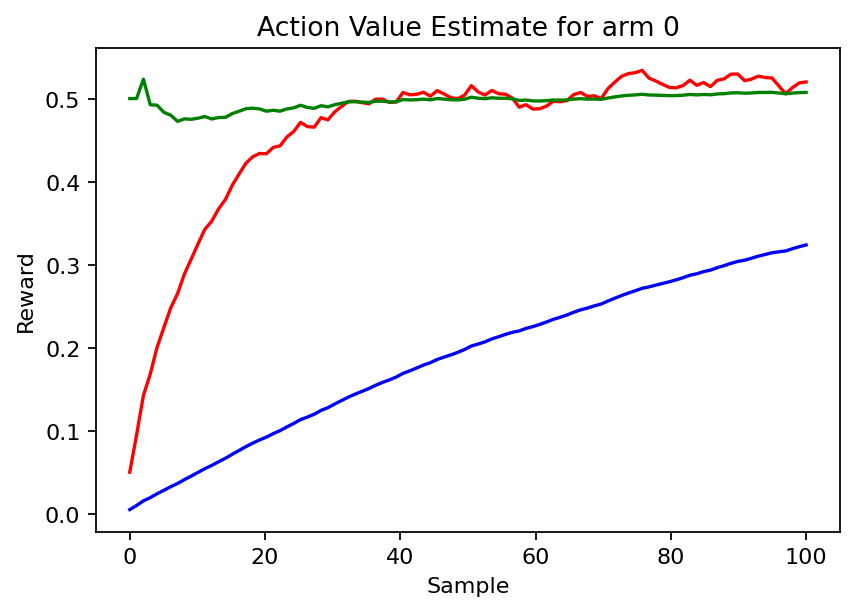

In [850]:
q3_arm_0_alpha_1 = q2_update(0.1, q3_reward_avg_0, -1)
q3_arm_0_alpha_2 = q2_update(0.01, q3_reward_avg_0, -1)
q3_arm_0_avg = q2_updateAvg(q3_reward_avg_0, -1)

t = np.linspace(0, 100, 100)

plt.figure(dpi=160)
plt.plot(t, q3_arm_0_alpha_1, 'r')
plt.plot(t, q3_arm_0_alpha_2, 'b')
plt.plot(t, q3_arm_0_avg, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 0')
plt.show()

For amr 1 (p = 0.4)

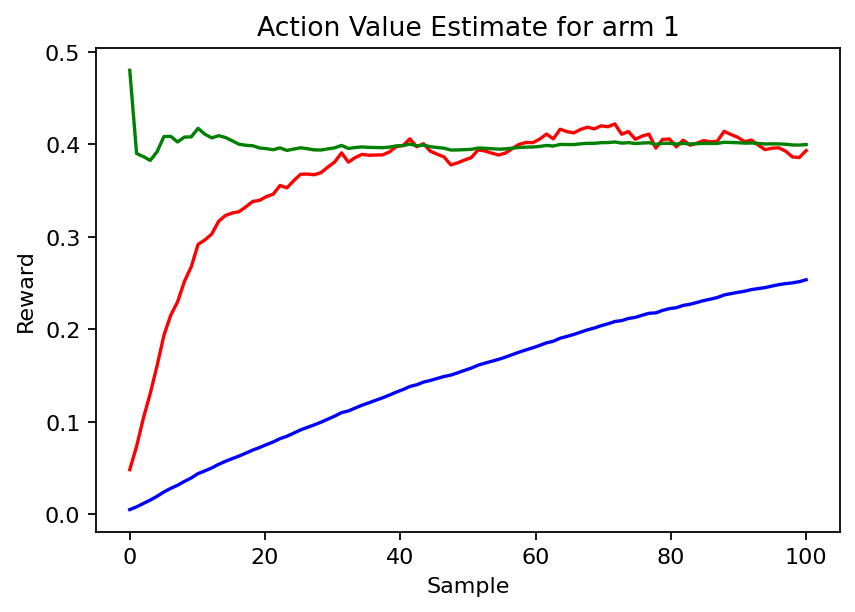

In [851]:
q3_arm_1_alpha_1 = q2_update(0.1, q3_reward_avg_1, -1)
q3_arm_1_alpha_2 = q2_update(0.01, q3_reward_avg_1, -1)
q3_arm_1_avg = q2_updateAvg(q3_reward_avg_1, -1)

t = np.linspace(0, 100, 100)

plt.figure(dpi=160)
plt.plot(t, q3_arm_1_alpha_1, 'r')
plt.plot(t, q3_arm_1_alpha_2, 'b')
plt.plot(t, q3_arm_1_avg, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 1')
plt.show()

For amr 2 (p = 0.3)

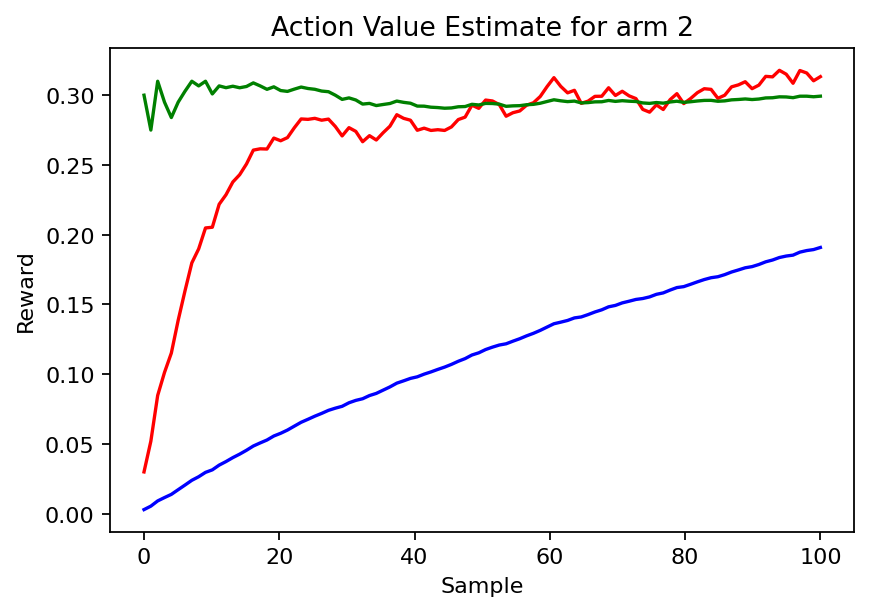

In [852]:
q3_arm_2_alpha_1 = q2_update(0.1, q3_reward_avg_2, -1)
q3_arm_2_alpha_2 = q2_update(0.01, q3_reward_avg_2, -1)
q3_arm_2_avg = q2_updateAvg(q3_reward_avg_2, -1)

t = np.linspace(0, 100, 100)

plt.figure(dpi=160)
plt.plot(t, q3_arm_2_alpha_1, 'r')
plt.plot(t, q3_arm_2_alpha_2, 'b')
plt.plot(t, q3_arm_2_avg, 'g')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 2')
plt.show()

Of all the three methods, only averaging and alpha = 0.1 were able to converge closer to the true value within 1000 timestep. 
alpha = 0.1 is better than 0.01, as it is able to coverage to true value with few trials. 
Both the alpha values methods have performed poor as compares to averaging as not only averaging get closer to the true value with less no. of trials but also have lesser variation throughtout the trial as compares to the alpha values. 
For further optimizatin we will look for alpha values between 0.1 and 1



Standard Deviation



```
The red dot represent lower limit of standard deviation
The green dot represent upper limit of standard deviation
The blue line represent the average reward
```



In [853]:
q3_std_0 = q3_calculate_std(q3_sample_arm_0)
q3_std_1 = q3_calculate_std(q3_sample_arm_1)
q3_std_2 = q3_calculate_std(q3_sample_arm_2)

q3_lower_0, q3_upper_0 = q3_make_sd_points(q3_reward_avg_0, q3_std_0)
q3_lower_1, q3_upper_1 = q3_make_sd_points(q3_reward_avg_1, q3_std_1)
q3_lower_2, q3_upper_2 = q3_make_sd_points(q3_reward_avg_2, q3_std_2)

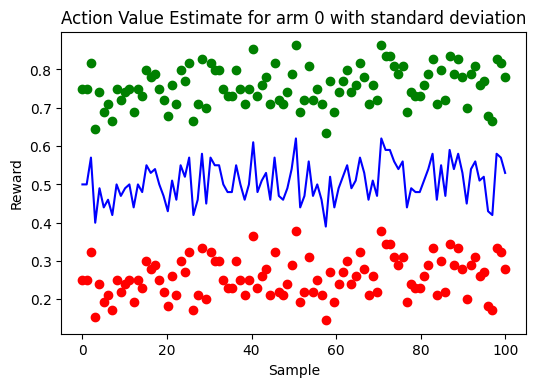

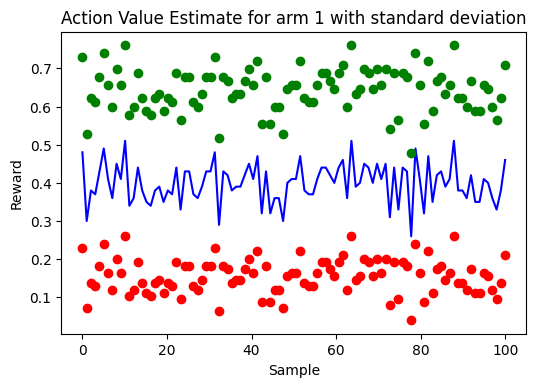

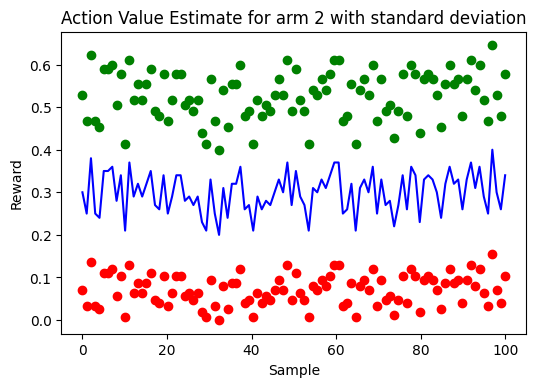

In [854]:
t = np.linspace(0, 100, 100)

plt.figure(dpi=100)
plt.plot(t, q3_reward_avg_0, 'b', t, q3_lower_0, 'ro', t, q3_upper_0, 'go')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 0 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q3_reward_avg_1, 'b', t, q3_lower_1, 'ro', t, q3_upper_1, 'go')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 1 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q3_reward_avg_2, 'b', t, q3_lower_2, 'ro', t, q3_upper_2, 'go')
plt.xlabel('Sample') 
plt.ylabel('Reward')
plt.title('Action Value Estimate for arm 2 with standard deviation')
plt.show()

# Question 4



```
0 -> epsilon = 0
1 -> epsilon = 1/8
2 -> epsilon = 1/4
3 -> epsilon = 1/2
4 -> epsilon = 1
```



Functions

In [855]:
def greedy_algo(e):
  Q = [0, 0, 0]
  N = [0, 0, 0]
  reward = []
  t_reward = 0
  optimal_action = []
  regret = []
  total_regret = []
  reg = 0
  tr = 0
  for t in range(1000):
    A = choose_arm_greedy(e, Q)
    if A == 0:
      optimal_action.append(1)
    else:
      optimal_action.append(0)
    R = bandit(A)
    N[A] = N[A] + 1
    Q[A] = Q[A] + (1 / N[A]) * (R - Q[A])
    if A == 0:
      reg = 0
    elif A == 1:
      reg = 0.1
    else:
      reg = 0.2
    t_reward = t_reward + R
    tr = tr + reg
    total_regret.append(tr)
    regret.append(reg)
    reward.append(t_reward)
  return reward, optimal_action, regret, total_regret

def bandit(arm):
  if arm == 0:
    return np.random.binomial(1, 0.5)
  elif arm == 1:
    return np.random.binomial(1, 0.4)
  else:
    return np.random.binomial(1, 0.3)

def choose_arm_greedy(e,Q):
  if Q[0] == Q[1] and Q[1] == Q[2]:
    return random.randint(0,2)

  decision = np.random.binomial(1, e)

  arm_0 = Q[0]
  arm_1 = Q[1]
  arm_2 = Q[2]

  if not(decision):
    if arm_0 > arm_1:
      if arm_0 > arm_2:
        return 0
      elif arm_0 == arm_2:
        return random.choice((0,2))
      else:
        return 2
    elif arm_1 > arm_0:
      if arm_1 > arm_2:
        return 1
      elif arm_1 == arm_2:
        return random.choice((1,2))
      else:
        return 2
    else:
      if arm_0 > arm_2:
        return random.choice((0,1))
      else:
        return 2
  else:
    if arm_0 > arm_1:
      if arm_1 > arm_2:
        return 2
      elif arm_1 == arm_2:
        return random.choice((1,2))
      else:
        return 1
    elif arm_1 > arm_0:
      if arm_0 > arm_2:
        return 2
      elif arm_0 == arm_2:
        return random.choice((0,2))
      else:
        return 0
    else:
      if arm_0 > arm_2:
        return 2
      else:
        return random.choice((0,1))

def question_4(e):
  result = []
  optimal = []
  regret = []
  total_regret = []
  for i in range(1,101):
    rewards, optimal_action, regret_inst, total_reg = greedy_algo(e)
    result.append(rewards)
    optimal.append(optimal_action)
    regret.append(regret_inst)
    total_regret.append(total_reg)
    
  return result, optimal, regret, total_regret

def q4_calculate_avg(arr):
  result = [] 
  sd = []
  for y in range(1000):
    average = []
    for x in range(100):
      average.append(arr[x][y])
    result.append(np.mean(average))
  return result

def q4_calculate_std(arr):
  sd = []
  for y in range(1000):
    average = []
    for x in range(100):
      average.append(arr[x][y])
    sd.append(np.std(average))
  return sd
  
def q4_make_sd_points(reward, sd):
  lower = []
  upper = []
  index = 0
  for num in reward:
    full = sd[index]
    half = full / 2
    lower.append(num - half)
    upper.append(num + half)
    index = index + 1
  return lower, upper

Dataset

In [856]:
q4_sample_0, q4_sample_oa_0, q4_sample_r_0, q4_sample_tr_0 = question_4(0)
q4_sample_1, q4_sample_oa_1, q4_sample_r_1, q4_sample_tr_1 = question_4(0.125)
q4_sample_2, q4_sample_oa_2, q4_sample_r_2, q4_sample_tr_2 = question_4(0.25)
q4_sample_3, q4_sample_oa_3, q4_sample_r_3, q4_sample_tr_3 = question_4(0.5)
q4_sample_4, q4_sample_oa_4, q4_sample_r_4, q4_sample_tr_4 = question_4(1)

Averaging over 100

In [857]:
q4_reward_avg_0 = q4_calculate_avg(q4_sample_0)
q4_reward_avg_1 = q4_calculate_avg(q4_sample_1)
q4_reward_avg_2 = q4_calculate_avg(q4_sample_2)
q4_reward_avg_3 = q4_calculate_avg(q4_sample_3)
q4_reward_avg_4 = q4_calculate_avg(q4_sample_4)

q4_oa_0 = q4_calculate_avg(q4_sample_oa_0)
q4_oa_1 = q4_calculate_avg(q4_sample_oa_1)
q4_oa_2 = q4_calculate_avg(q4_sample_oa_2)
q4_oa_3 = q4_calculate_avg(q4_sample_oa_3)
q4_oa_4 = q4_calculate_avg(q4_sample_oa_4)

q4_regret_0 = q4_calculate_avg(q4_sample_r_0)
q4_regret_1 = q4_calculate_avg(q4_sample_r_1)
q4_regret_2 = q4_calculate_avg(q4_sample_r_2)
q4_regret_3 = q4_calculate_avg(q4_sample_r_3)
q4_regret_4 = q4_calculate_avg(q4_sample_r_4)

q4_total_regret_0 = q4_calculate_avg(q4_sample_tr_0)
q4_total_regret_1 = q4_calculate_avg(q4_sample_tr_1)
q4_total_regret_2 = q4_calculate_avg(q4_sample_tr_2)
q4_total_regret_3 = q4_calculate_avg(q4_sample_tr_3)
q4_total_regret_4 = q4_calculate_avg(q4_sample_tr_4)



```
The Red line represent 0 -> epsilon = 0
The Blue line represent 1 -> epsilon = 1/8
The Green line represent 2 -> epsilon = 1/4
The Cyan line represent 3 -> epsilon = 1/2
The Magenta line represent 4 -> epsilon = 1
```



Rewards plot

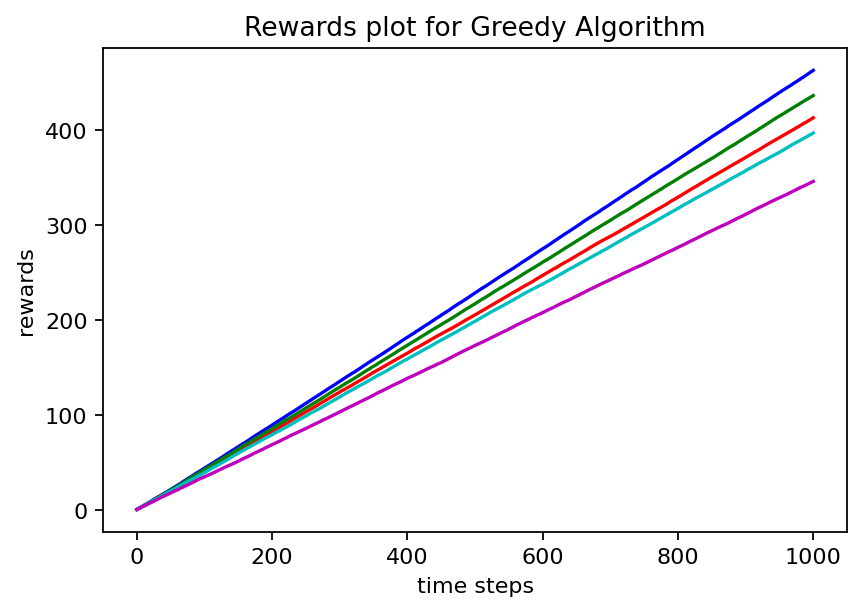

In [858]:
t = np.linspace(0, 1000, 1000)

plt.figure(dpi=160)
plt.plot(t, q4_reward_avg_0, 'r')
plt.plot(t, q4_reward_avg_1, 'b')
plt.plot(t, q4_reward_avg_2, 'g') 
plt.plot(t, q4_reward_avg_3, 'c')
plt.plot(t, q4_reward_avg_4, 'm')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for Greedy Algorithm')
plt.show()

Percentage of optimal action plot

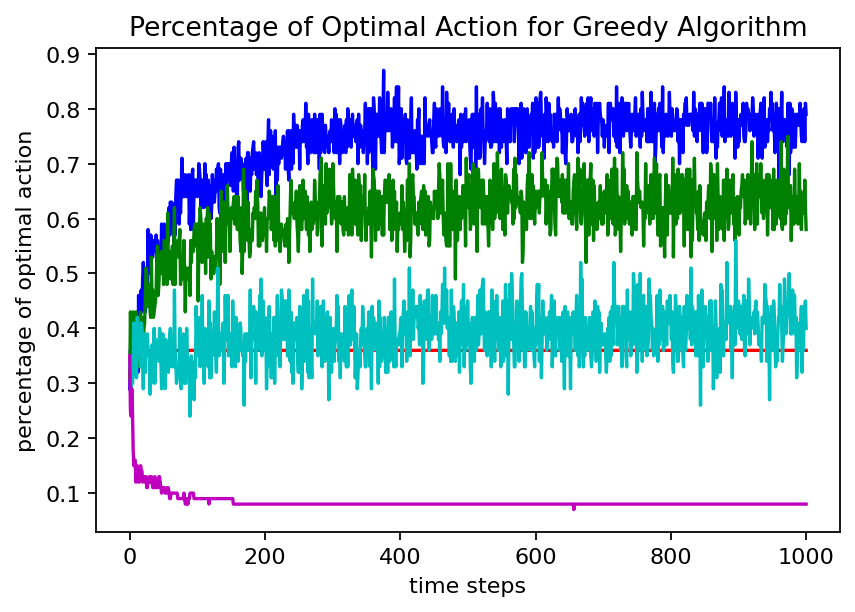

In [859]:
t = np.linspace(0, 1000, 1000)

plt.figure(dpi=160)
plt.plot(t, q4_oa_0, 'r')
plt.plot(t, q4_oa_1, 'b')
plt.plot(t, q4_oa_2, 'g')
plt.plot(t, q4_oa_3, 'c')
plt.plot(t, q4_oa_4, 'm')
plt.xlabel('time steps')
plt.ylabel('percentage of optimal action')
plt.title('Percentage of Optimal Action for Greedy Algorithm')
plt.show()

Instantaneous Regret Plot

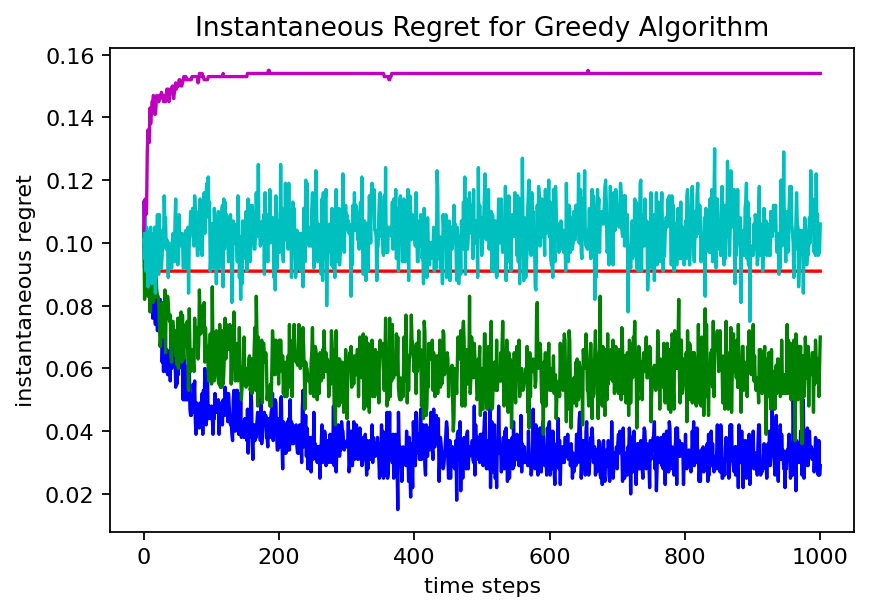

In [860]:
t = np.linspace(0, 1000, 1000)

plt.figure(dpi=160)
plt.plot(t, q4_regret_0, 'r')
plt.plot(t, q4_regret_1, 'b')
plt.plot(t, q4_regret_2, 'g')
plt.plot(t, q4_regret_3, 'c')
plt.plot(t, q4_regret_4, 'm')
plt.xlabel('time steps')
plt.ylabel('instantaneous regret')
plt.title('Instantaneous Regret for Greedy Algorithm')
plt.show()

Total Regret Plot

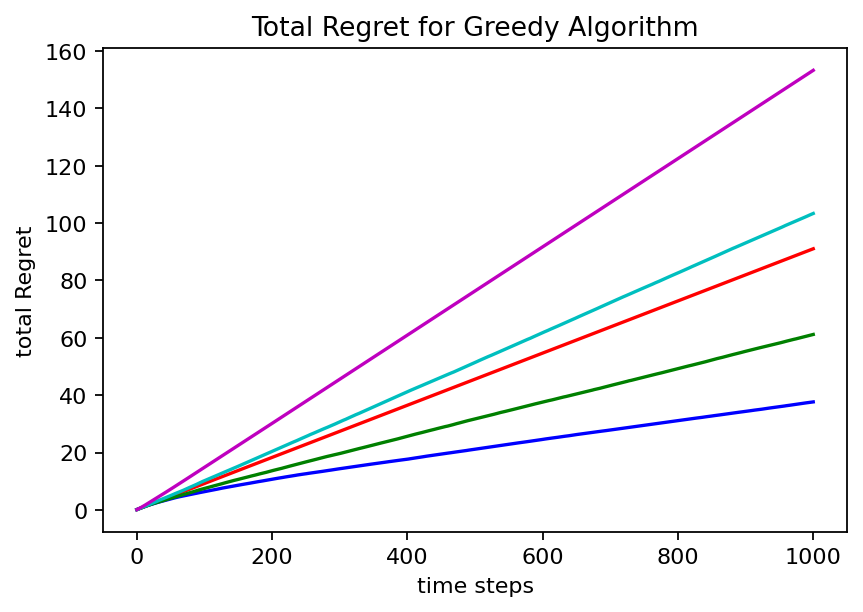

In [861]:
t = np.linspace(0, 1000, 1000)

plt.figure(dpi=160)
plt.plot(t, q4_total_regret_0, 'r')
plt.plot(t, q4_total_regret_1, 'b')
plt.plot(t, q4_total_regret_2, 'g')
plt.plot(t, q4_total_regret_3, 'c')
plt.plot(t, q4_total_regret_4, 'm')
plt.xlabel('time steps')
plt.ylabel('total Regret')
plt.title('Total Regret for Greedy Algorithm')
plt.show()

We can say that the performance of greedy algorithm increase as we decrease the value of epsilon.  

In rewards plot: Epsilon = 1/8 performs the best, followed by Epsilon = 1/4, Epsilon = 0, Epsilon = 1/2 and lastly Epsilon = 1. Epsilon = 1/8 and Epsilon = 1/4 perform better than Epsilon = 0, while Epsilon = 1 and Epsilon = 1/2 performs worse than Epsilon = 0. This is evident from Optimal Action % plot. 

In % of Optimal Action plot: Epsilon = 1/8 and Epsilon = 1/4 tend to have upwards trend in percentage of optimal action (i.e., choosing arm 0 with p = 0.5), where else Epsilon = 1/2 have stable (reamins same) trend and Epsilon = 1 downward trend in percentage of optimal action. Both, Epsilon = 1/2 and Epsilon = 1, have taken lesser optimal action than Epsilon = 0, whereas both Epsilon = 1/8 and Epsilon = 1/4 have taken more optimal action taken than Epsilon = 0. 

In Instantaneous Regret Plot: Epsilon = 1/2 and Epsilon = 1, have higher regret than Epsilon = 0, whereas both Epsilon = 1/8 and Epsilon = 1/4 have lesser regret than Epsilon = 0. We can also see that Optimal action percentage plot is inversely proportional to Instantaneous Regret Plot, so we can say maximizing % optimal action = Minizining regret. 

In total regret plot: Epsilon = 1/8 has the worse plot, followed by Epsilon = 1/4, Epsilon = 0, Epsilon = 1/2 and lastly Epsilon = 1.

We conclude that the greedy algorithm performs best with epsilon = 1/8

Standard Deviation


```
The red dot represent lower limit of standard deviation
The green dot represent upper limit of standard deviation
The blue line represent the average reward
```



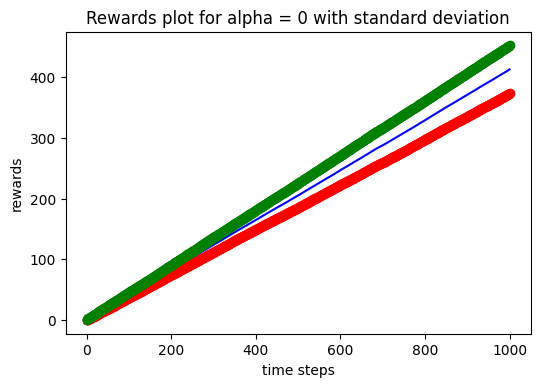

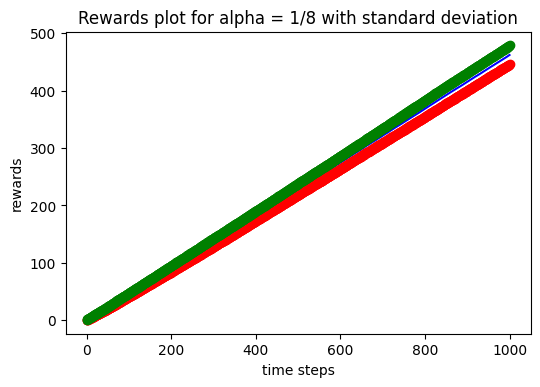

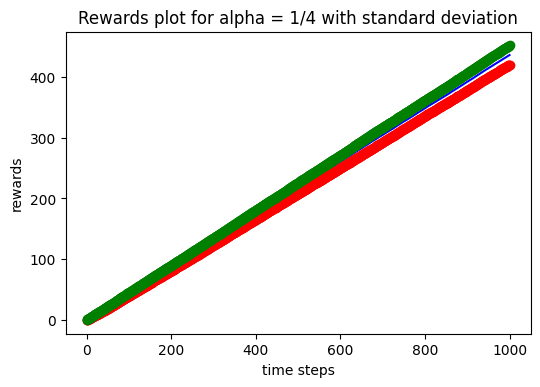

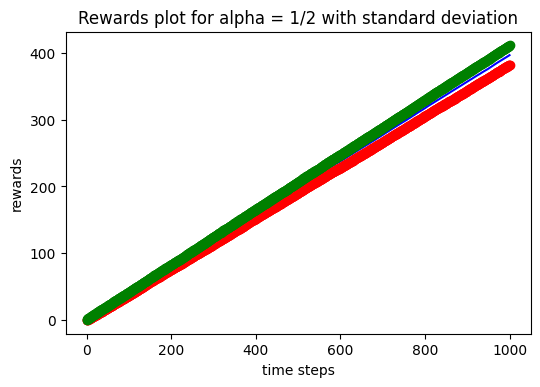

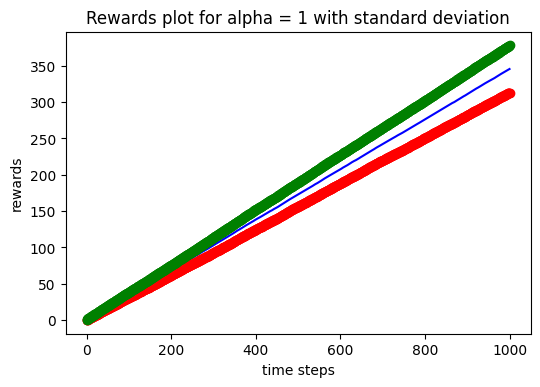

In [862]:
q4_std_0 = q4_calculate_std(q4_sample_0)
q4_std_1 = q4_calculate_std(q4_sample_1)
q4_std_2 = q4_calculate_std(q4_sample_2)
q4_std_3 = q4_calculate_std(q4_sample_3)
q4_std_4 = q4_calculate_std(q4_sample_4)

q4_lower_0, q4_upper_0 = q4_make_sd_points(q4_reward_avg_0, q4_std_0)
q4_lower_1, q4_upper_1 = q4_make_sd_points(q4_reward_avg_1, q4_std_1)
q4_lower_2, q4_upper_2 = q4_make_sd_points(q4_reward_avg_2, q4_std_2)
q4_lower_3, q4_upper_3 = q4_make_sd_points(q4_reward_avg_3, q4_std_3)
q4_lower_4, q4_upper_4 = q4_make_sd_points(q4_reward_avg_4, q4_std_4)

plt.figure(dpi=100)
plt.plot(t, q4_reward_avg_0, 'b', t, q4_lower_0, 'ro', t, q4_upper_0, 'go')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 0 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q4_reward_avg_1, 'b', t, q4_lower_1, 'ro', t, q4_upper_1, 'go')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 1/8 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q4_reward_avg_2, 'b', t, q4_lower_2, 'ro', t, q4_upper_2, 'go')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 1/4 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q4_reward_avg_3, 'b', t, q4_lower_3, 'ro', t, q4_upper_3, 'go')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 1/2 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q4_reward_avg_4, 'b', t, q4_lower_4, 'ro', t, q4_upper_4, 'go')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 1 with standard deviation')
plt.show()


# **Question 5**

```
e4a0 -> epsilon = 1/4 and alpha = 0.1
e4a1 -> epsilon = 1/4 and alpha = 0.01
e4a2 -> epsilon = 1/4 and alpha = 0.001
e8a0 -> epsilon = 1/8 and alpha = 0.1
e8a1 -> epsilon = 1/8 and alpha = 0.01
e8a2 -> epsilon = 1/8 and alpha = 0.001
```


Functions

In [863]:
def greedy_algo_alpha(e, alpha):
  Q = [0, 0, 0]
  N = [0, 0, 0]
  reward = []
  optimal_action = []
  regret = []
  total_regret = []
  reg = 0
  tr = 0
  t_reward = 0
  for i in range(1000):
    A = choose_arm_greedy(e, Q)
    if A == 0:
      optimal_action.append(1)
    else:
      optimal_action.append(0)
    R = bandit(A)
    N[A] = N[A] + 1
    Q[A] = Q[A] + (alpha) * (R - Q[A])
    if A == 0:
      reg = 0
    elif A == 1:
      reg = 0.1
    else:
      reg = 0.2
    t_reward = t_reward + R
    tr = tr + reg
    total_regret.append(tr)
    regret.append(reg)
    reward.append(t_reward)
  return reward, optimal_action, regret, total_regret

def question_5(e, alpha):
  result = [] 
  optimal = []
  regret = []
  total_regret = []
  for i in range(1,101):
    rewards, optimal_action, regret_inst, total_reg = greedy_algo_alpha(e, alpha)
    result.append(rewards)
    optimal.append(optimal_action)
    regret.append(regret_inst)
    total_regret.append(total_reg)
  return result, optimal, regret, total_regret


Dataset

In [864]:
q5_sample_e_4_alpha_0, q5_sample_e4a0_oa, q5_sample_e4a0_r, q5_sample_e4a0_t = question_5(0.25, 0.1)
q5_sample_e_4_alpha_1, q5_sample_e4a1_oa, q5_sample_e4a1_r, q5_sample_e4a1_t = question_5(0.25, 0.01)
q5_sample_e_4_alpha_2, q5_sample_e4a2_oa, q5_sample_e4a2_r, q5_sample_e4a2_t = question_5(0.25, 0.001)

q5_sample_e_8_alpha_0, q5_sample_e8a0_oa, q5_sample_e8a0_r, q5_sample_e8a0_t = question_5(0.125, 0.1)
q5_sample_e_8_alpha_1, q5_sample_e8a1_oa, q5_sample_e8a1_r, q5_sample_e8a1_t = question_5(0.125, 0.01)
q5_sample_e_8_alpha_2, q5_sample_e8a2_oa, q5_sample_e8a2_r, q5_sample_e8a2_t = question_5(0.125, 0.001)

Averaging over 100

In [865]:
q5_reward_avg_e4a0 = q4_calculate_avg(q5_sample_e_4_alpha_0)
q5_reward_avg_e4a1 = q4_calculate_avg(q5_sample_e_4_alpha_1)
q5_reward_avg_e4a2 = q4_calculate_avg(q5_sample_e_4_alpha_2)
q5_reward_avg_e8a0 = q4_calculate_avg(q5_sample_e_8_alpha_0)
q5_reward_avg_e8a1 = q4_calculate_avg(q5_sample_e_8_alpha_1)
q5_reward_avg_e8a2 = q4_calculate_avg(q5_sample_e_8_alpha_2)

q5_oa_e4a0 = q4_calculate_avg(q5_sample_e4a0_oa)
q5_oa_e4a1 = q4_calculate_avg(q5_sample_e4a1_oa)
q5_oa_e4a2 = q4_calculate_avg(q5_sample_e4a2_oa)
q5_oa_e8a0 = q4_calculate_avg(q5_sample_e8a0_oa)
q5_oa_e8a1 = q4_calculate_avg(q5_sample_e8a1_oa)
q5_oa_e8a2 = q4_calculate_avg(q5_sample_e8a2_oa)

q5_regret_e4a0 = q4_calculate_avg(q5_sample_e4a0_r)
q5_regret_e4a1 = q4_calculate_avg(q5_sample_e4a1_r)
q5_regret_e4a2 = q4_calculate_avg(q5_sample_e4a2_r)
q5_regret_e8a0 = q4_calculate_avg(q5_sample_e8a0_r)
q5_regret_e8a1 = q4_calculate_avg(q5_sample_e8a1_r)
q5_regret_e8a2 = q4_calculate_avg(q5_sample_e8a2_r)

q5_total_regret_e4a0 = q4_calculate_avg(q5_sample_e4a0_t)
q5_total_regret_e4a1 = q4_calculate_avg(q5_sample_e4a1_t)
q5_total_regret_e4a2 = q4_calculate_avg(q5_sample_e4a2_t)
q5_total_regret_e8a0 = q4_calculate_avg(q5_sample_e8a0_t)
q5_total_regret_e8a1 = q4_calculate_avg(q5_sample_e8a1_t)
q5_total_regret_e8a2 = q4_calculate_avg(q5_sample_e8a2_t)

```
The Red line represent e4a0 -> epsilon = 1/4 and alpha = 0.1
The Blue line represent e4a1 -> epsilon = 1/4 and alpha = 0.01
The Green line represent e4a2 -> epsilon = 1/4 and alpha = 0.001
The Cyan line represent e8a0 -> epsilon = 1/8 and alpha = 0.1
The Magenta line represent e8a1 -> epsilon = 1/8 and alpha = 0.01
The Yellow line represent e8a2 -> epsilon = 1/8 and alpha = 0.001
```


Rewards Plot

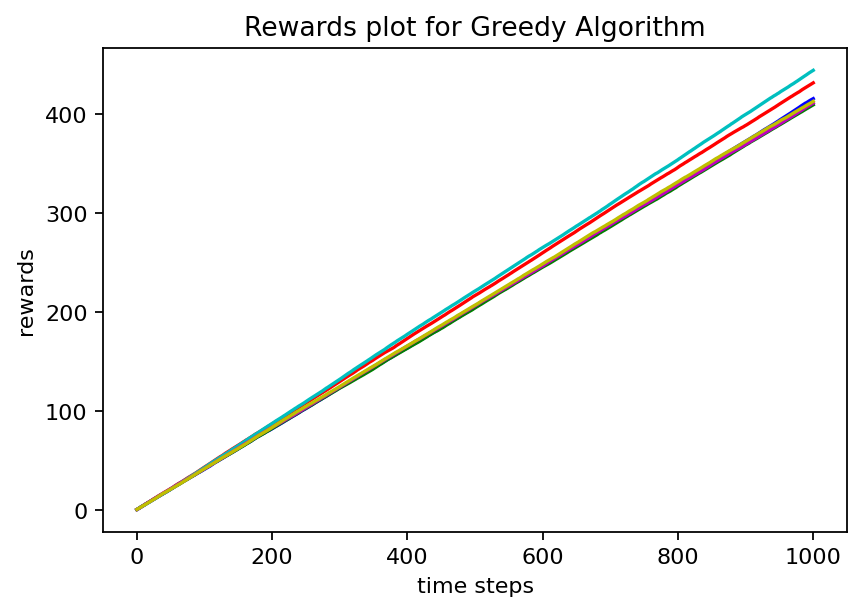

In [866]:
t = np.linspace(0, 1000, 1000)

plt.figure(dpi=160)
plt.plot(t, q5_reward_avg_e4a0, 'r')
plt.plot(t, q5_reward_avg_e4a1, 'b')
plt.plot(t, q5_reward_avg_e4a2, 'g')
plt.plot(t, q5_reward_avg_e8a0, 'c')
plt.plot(t, q5_reward_avg_e8a1, 'm')
plt.plot(t, q5_reward_avg_e8a2, 'y')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for Greedy Algorithm')
plt.show()

Percentage of Optimal Action Plot

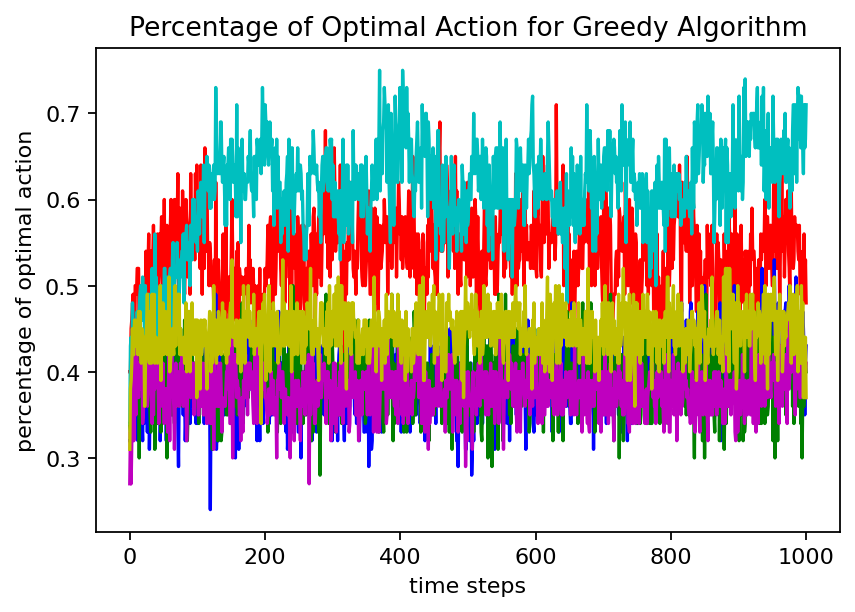

In [867]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q5_oa_e4a0, 'r')
plt.plot(t, q5_oa_e4a1, 'b')
plt.plot(t, q5_oa_e4a2, 'g')
plt.plot(t, q5_oa_e8a0, 'c')
plt.plot(t, q5_oa_e8a1, 'm')
plt.plot(t, q5_oa_e8a2, 'y')
plt.xlabel('time steps')
plt.ylabel('percentage of optimal action')
plt.title('Percentage of Optimal Action for Greedy Algorithm')
plt.show()

Instantaneous Regret Plot

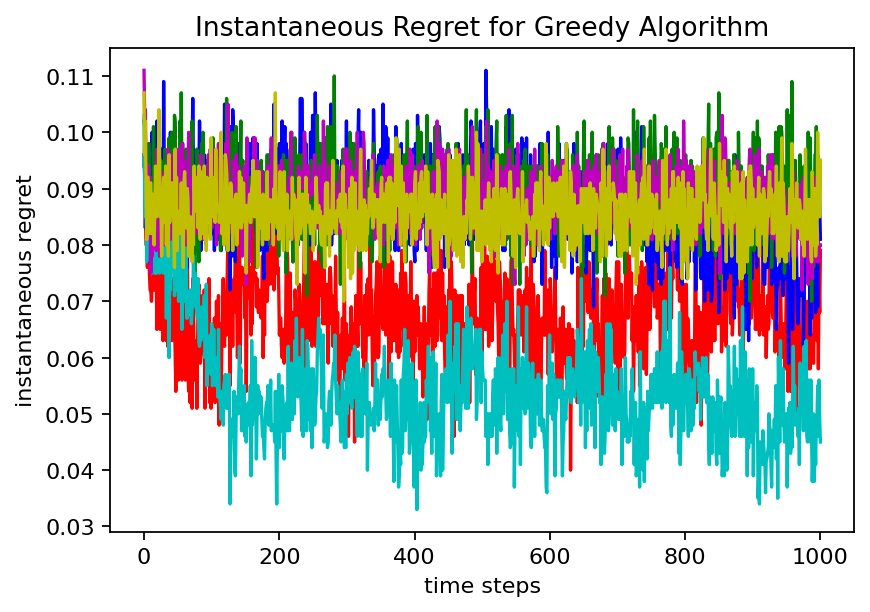

In [868]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q5_regret_e4a0, 'r')
plt.plot(t, q5_regret_e4a1, 'b')
plt.plot(t, q5_regret_e4a2, 'g')
plt.plot(t, q5_regret_e8a0, 'c')
plt.plot(t, q5_regret_e8a1, 'm')
plt.plot(t, q5_regret_e8a2, 'y')
plt.xlabel('time steps')
plt.ylabel('instantaneous regret')
plt.title('Instantaneous Regret for Greedy Algorithm')
plt.show()

Total Regret Plot

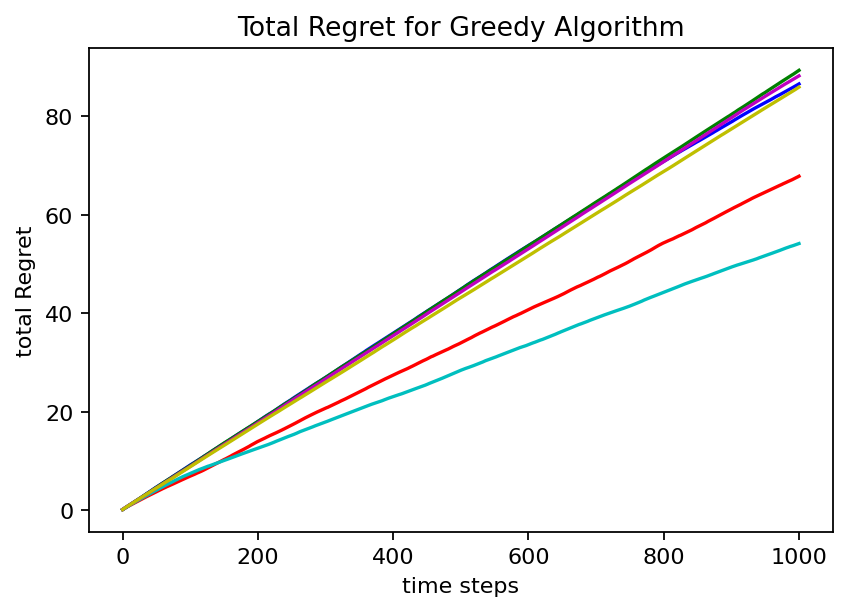

In [869]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q5_total_regret_e4a0, 'r')
plt.plot(t, q5_total_regret_e4a1, 'b')
plt.plot(t, q5_total_regret_e4a2, 'g')
plt.plot(t, q5_total_regret_e8a0, 'c')
plt.plot(t, q5_total_regret_e8a1, 'm')
plt.plot(t, q5_total_regret_e8a2, 'y')
plt.xlabel('time steps')
plt.ylabel('total Regret')
plt.title('Total Regret for Greedy Algorithm')
plt.show()

The Greedy algorithm with epsilon = 1/8 and alpha = 0.1 has better performance than the rest parameters. This is evident in Reward plot (most rewards received), % optimal Action Plot (higher than other throughout), Instantaneous Regret plot (Lower than other throughout) and Total regret plot (least). 

Standard Deviation

```
The red dot represent lower limit of standard deviation
The green dot represent upper limit of standard deviation
The blue line represent the average reward
```

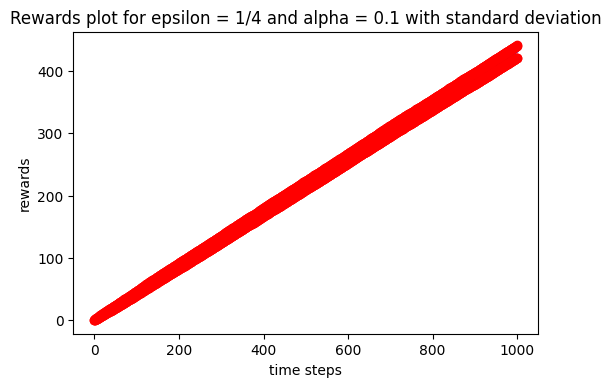

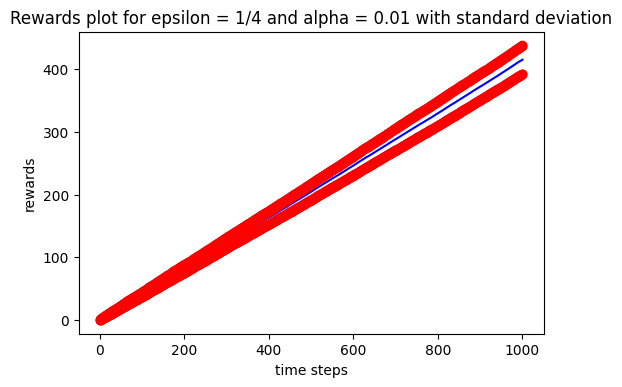

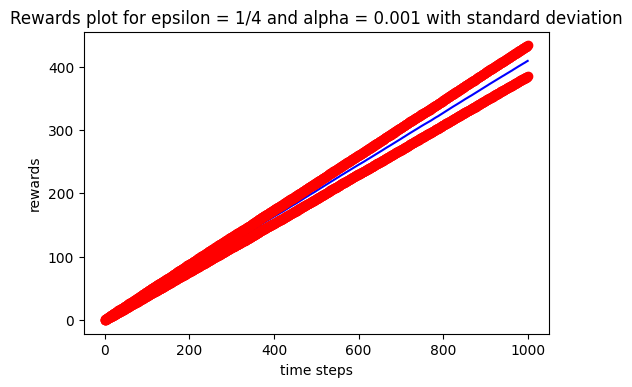

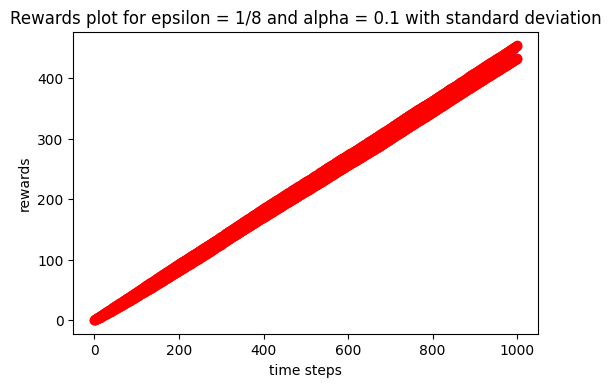

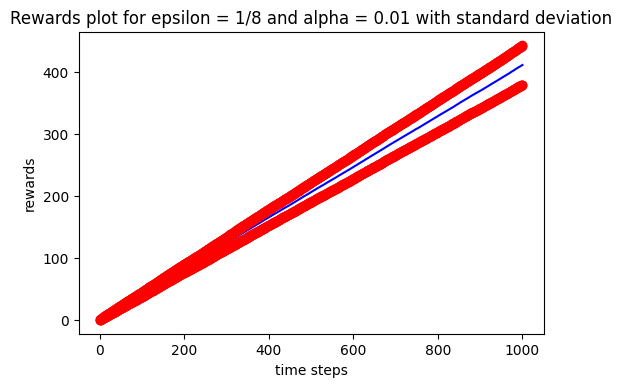

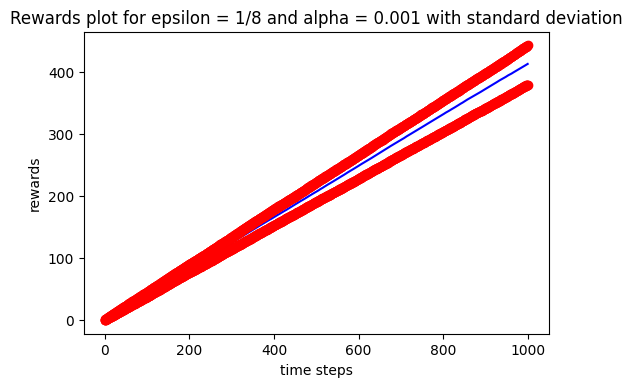

In [870]:
q5_std_0 = q4_calculate_std(q5_sample_e_4_alpha_0)
q5_std_1 = q4_calculate_std(q5_sample_e_4_alpha_1)
q5_std_2 = q4_calculate_std(q5_sample_e_4_alpha_2)
q5_std_3 = q4_calculate_std(q5_sample_e_8_alpha_0)
q5_std_4 = q4_calculate_std(q5_sample_e_8_alpha_1)
q5_std_5 = q4_calculate_std(q5_sample_e_8_alpha_2)

q5_lower_0, q5_upper_0 = q4_make_sd_points(q5_reward_avg_e4a0, q5_std_0)
q5_lower_1, q5_upper_1 = q4_make_sd_points(q5_reward_avg_e4a1, q5_std_1)
q5_lower_2, q5_upper_2 = q4_make_sd_points(q5_reward_avg_e4a2, q5_std_2)
q5_lower_3, q5_upper_3 = q4_make_sd_points(q5_reward_avg_e8a0, q5_std_3)
q5_lower_4, q5_upper_4 = q4_make_sd_points(q5_reward_avg_e8a1, q5_std_4)
q5_lower_5, q5_upper_5 = q4_make_sd_points(q5_reward_avg_e8a2, q5_std_5)

plt.figure(dpi=100)
plt.plot(t, q5_reward_avg_e4a0, 'b', t, q5_lower_0, 'ro', t, q5_upper_0, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for epsilon = 1/4 and alpha = 0.1 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q5_reward_avg_e4a1, 'b', t, q5_lower_1, 'ro', t, q5_upper_1, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for epsilon = 1/4 and alpha = 0.01 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q5_reward_avg_e4a2, 'b', t, q5_lower_2, 'ro', t, q5_upper_2, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for epsilon = 1/4 and alpha = 0.001 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q5_reward_avg_e8a0, 'b', t, q5_lower_3, 'ro', t, q5_upper_3, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for epsilon = 1/8 and alpha = 0.1 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q5_reward_avg_e8a1, 'b', t, q5_lower_4, 'ro', t, q5_upper_4, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for epsilon = 1/8 and alpha = 0.01 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q5_reward_avg_e8a2, 'b', t, q5_lower_4, 'ro', t, q5_upper_4, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for epsilon = 1/8 and alpha = 0.001 with standard deviation')
plt.show()

# **Question 6**

```
0 -> alpha = 0.1
1 -> alpha = 0.01
2 -> alpha = 0.001
```

Function

In [871]:
def ucb(alpha):
  Q = [0, 0, 0]
  N = [1, 1, 1]
  reward = []
  optimal_action = []
  regret = []
  total_regret = []
  reg = 0
  tr = 0
  t_reward = 0
  for t in range(1,1001):
    A = choose_arm_ucb(t, Q, N)
    if A == 0:
      optimal_action.append(1)
    else:
      optimal_action.append(0)
    R = bandit(A)
    N[A] = N[A] + 1
    Q[A] = Q[A] + (alpha) * (R - Q[A])
    if A == 0:
      reg = 0
    elif A == 1:
      reg = 0.1
    else:
      reg = 0.2
    t_reward = t_reward + R
    tr = tr + reg
    total_regret.append(tr)
    regret.append(reg)
    reward.append(t_reward)  
  return reward, optimal_action, regret, total_regret

def choose_arm_ucb(t, Q, N):
  arm_0 = Q[0] + 2 * math.sqrt(math.log(t)/ N[0])
  arm_1 = Q[1] + 2 * math.sqrt(math.log(t)/ N[1])
  arm_2 = Q[2] + 2 * math.sqrt(math.log(t)/ N[2])

  if arm_0 == arm_1 and arm_1 == arm_2:
    return random.randint(0,2)

  if arm_0 > arm_1:
      if arm_0 > arm_2:
        return 0
      elif arm_0 == arm_2:
        return random.choice((0,2))
      else:
        return 2
  elif arm_1 > arm_0:
      if arm_1 > arm_2:
        return 1
      elif arm_1 == arm_2:
        return random.choice((1,2))
      else:
        return 2
  else:
      if arm_0 > arm_2:
        return random.choice((0,1))
      else:
        return 2
  
def question_6(alpha):
  result = [] 
  optimal = []
  regret = []
  total_regret = []
  for i in range(1,101):
    rewards, optimal_action, regret_inst, total_reg = ucb(alpha)
    result.append(rewards)
    optimal.append(optimal_action)
    regret.append(regret_inst)
    total_regret.append(total_reg)
  return result, optimal, regret, total_regret

Dataset

In [872]:
q6_sample_0, q6_sample_oa_0, q6_sample_r_0, q6_sample_tr_0 = question_6(0.1)
q6_sample_1, q6_sample_oa_1, q6_sample_r_1, q6_sample_tr_1 = question_6(0.01)
q6_sample_2, q6_sample_oa_2, q6_sample_r_2, q6_sample_tr_2 = question_6(0.001)

Averaging Over 100

In [873]:
q6_reward_avg_0 = q4_calculate_avg(q6_sample_0)
q6_reward_avg_1 = q4_calculate_avg(q6_sample_1)
q6_reward_avg_2 = q4_calculate_avg(q6_sample_2)


q6_oa_0 = q4_calculate_avg(q6_sample_oa_0)
q6_oa_1 = q4_calculate_avg(q6_sample_oa_1)
q6_oa_2 = q4_calculate_avg(q6_sample_oa_2)


q6_regret_0 = q4_calculate_avg(q6_sample_r_0)
q6_regret_1 = q4_calculate_avg(q6_sample_r_1)
q6_regret_2 = q4_calculate_avg(q6_sample_r_2)

q6_total_regret_0 = q4_calculate_avg(q6_sample_tr_0)
q6_total_regret_1 = q4_calculate_avg(q6_sample_tr_1)
q6_total_regret_2 = q4_calculate_avg(q6_sample_tr_2)




```
The Red line represent 0 -> alpha = 0.1
The Blue line represent 1 -> alpha = 0.01
The Green line represent 2 -> alpha = 0.001
```



Rewards Plot

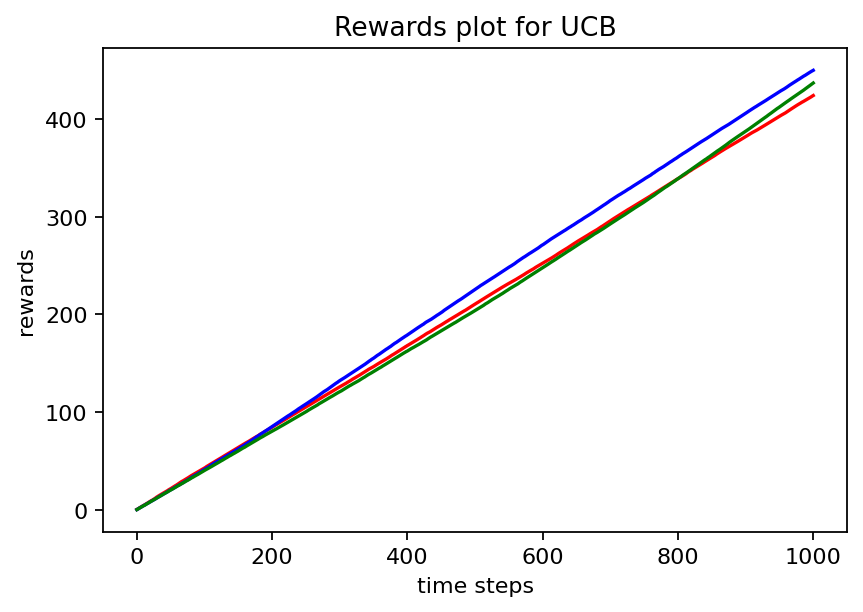

In [874]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q6_reward_avg_0, 'r')
plt.plot(t, q6_reward_avg_1, 'b')
plt.plot(t, q6_reward_avg_2, 'g')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for UCB')
plt.show()

Percentage of Optimal Action Plot

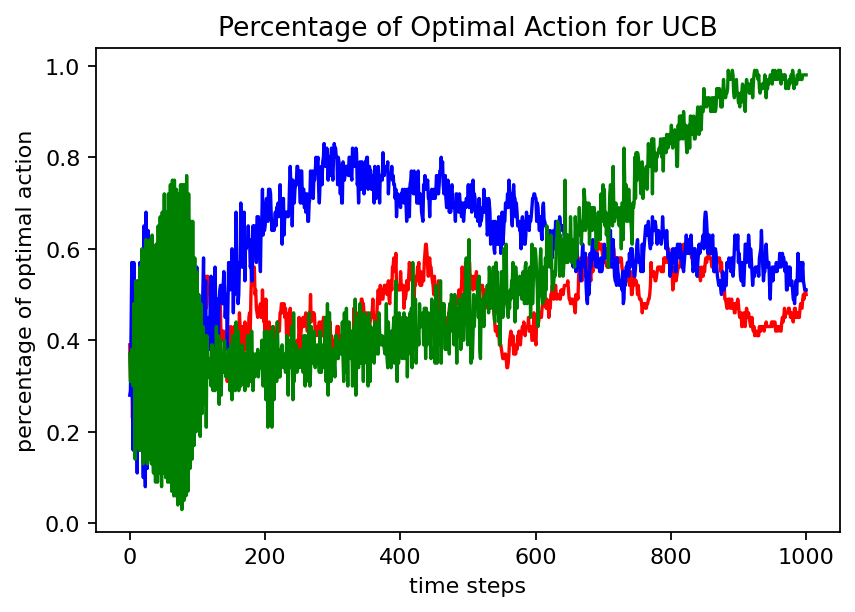

In [875]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q6_oa_0, 'r')
plt.plot(t, q6_oa_1, 'b')
plt.plot(t, q6_oa_2, 'g')
plt.xlabel('time steps')
plt.ylabel('percentage of optimal action')
plt.title('Percentage of Optimal Action for UCB')
plt.show()

Instantaneous Regret Plot

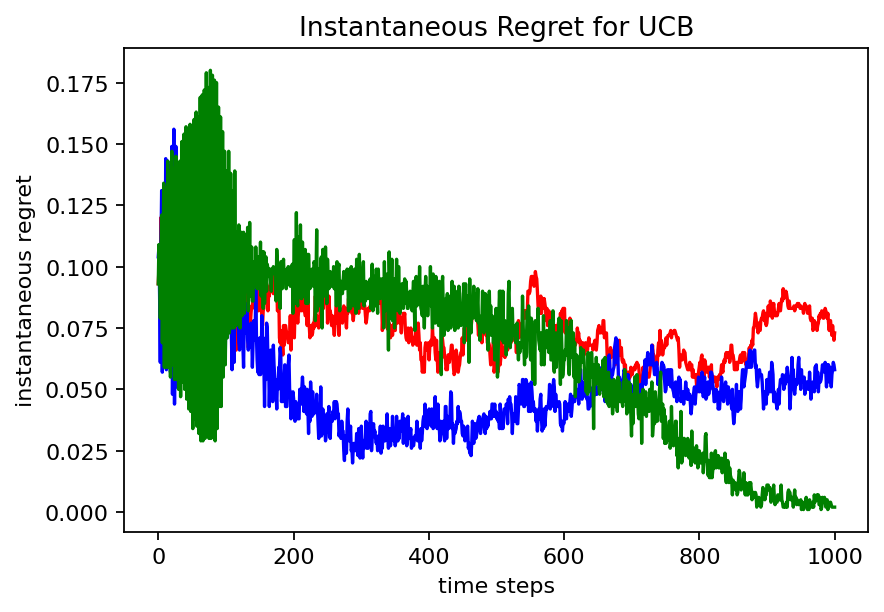

In [876]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q6_regret_0, 'r')
plt.plot(t, q6_regret_1, 'b')
plt.plot(t, q6_regret_2, 'g')
plt.xlabel('time steps')
plt.ylabel('instantaneous regret')
plt.title('Instantaneous Regret for UCB')
plt.show()

Total Regret Plot

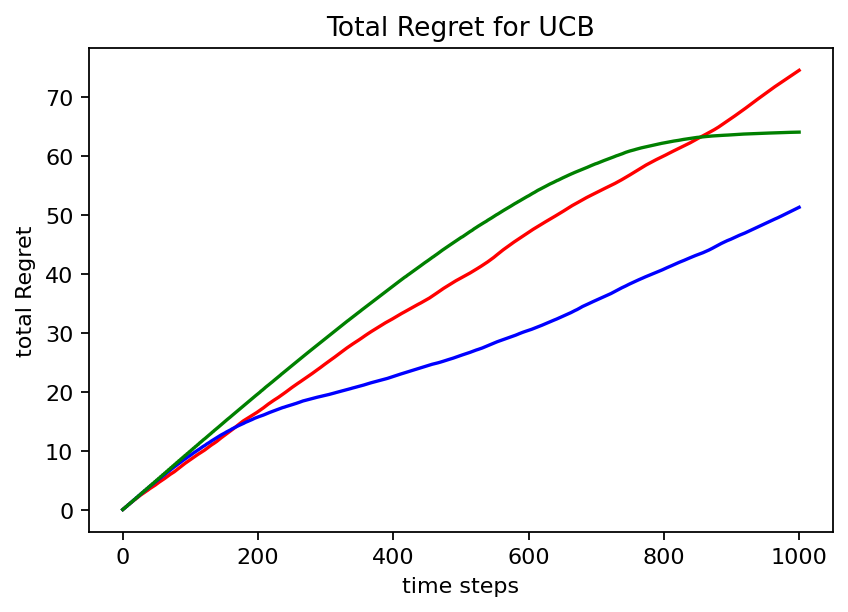

In [877]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q6_total_regret_0, 'r')
plt.plot(t, q6_total_regret_1, 'b')
plt.plot(t, q6_total_regret_2, 'g')
plt.xlabel('time steps')
plt.ylabel('total Regret')
plt.title('Total Regret for UCB')
plt.show()

UCB with alpha = 0.001 sems to have better performance than alpha = 0.01 and alpha = 0.1  

In rewards plot: we can see that alpha = 0.01 performs better than alpha = 0.1 and alpha = 0.001. 

alpha = 0.1 seems to perform better than alpha = 0.001 but towards the end alpha = 0.001 overtook alpha = 0.1 in terms of rewards received. alpha = 0.01 seems to have straight line where alpha = 0.1 have a downwards trend and alpha = 0.001 have upwards trend. 

in % of Optimal Action Plot, alpha = 0.01 tends to have better performance than alpha = 0.001 and alpha = 0.1, but at t = 600 (approx.) alpha = 0.001 have shown upward trend as compares to alpha = 0.1 and alpha = 0.01 and have more % of Optimal Action taken at the end. alpha = 0.01 have downward trend whereas alpha = 0.1 remains mostly same 

In Instantaneous Regret Plot: Alpha = 0.001 have downward trend whereas alpha = 0.1 and alpha 0.01 remains mostly same. towards the end Alpha = 0.001 have least instantaneous regret as compares to Alpha = 0.01 and Alpha = 0.1 

in Total regret graph: alpha = 0.01 have seems to have reach a plateau towards the ends where else alpha = 0.001 and alpha = 0.01 both have linear (upward) trends. 

Standard Deviation

```
The red dot represent lower limit of standard deviation
The green dot represent upper limit of standard deviation
The blue line represent the average reward
```

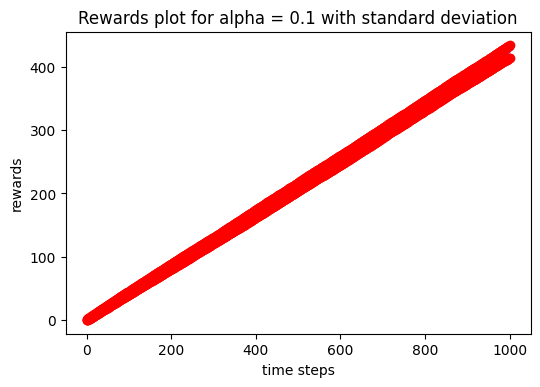

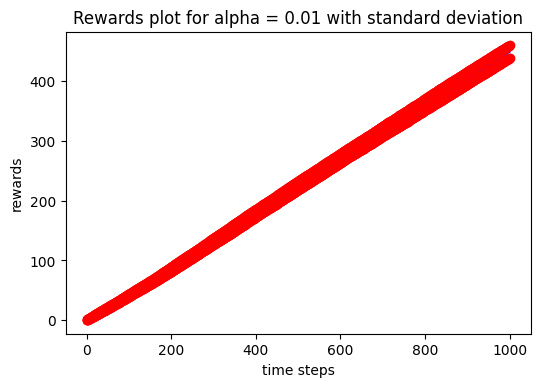

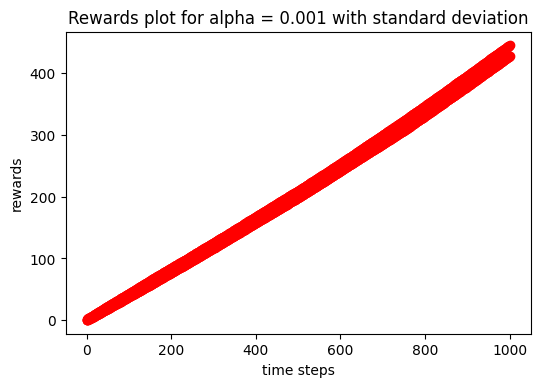

In [878]:
q6_std_0 = q4_calculate_std(q6_sample_0)
q6_std_1 = q4_calculate_std(q6_sample_1)
q6_std_2 = q4_calculate_std(q6_sample_2)


q6_lower_0, q6_upper_0 = q4_make_sd_points(q6_reward_avg_0, q6_std_0)
q6_lower_1, q6_upper_1 = q4_make_sd_points(q6_reward_avg_1, q6_std_1)
q6_lower_2, q6_upper_2 = q4_make_sd_points(q6_reward_avg_2, q6_std_2)

plt.figure(dpi=100)
plt.plot(t, q6_reward_avg_0, 'b', t, q6_lower_0, 'ro', t, q6_upper_0, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 0.1 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q6_reward_avg_1, 'b', t, q6_lower_1, 'ro', t, q6_upper_1, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 0.01 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q6_reward_avg_2, 'b', t, q6_lower_2, 'ro', t, q6_upper_2, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 0.001 with standard deviation')
plt.show()

# **Question 7**

**PLEASE NOTE: that I have run the Thompson Sampling three times. I am aware that alpha doesn't affect anything but I call trial as alpha = 0.1, 0.01 and 0.001, just to be cinsistent with given question**

```
0 -> trial 1 (say alpha = 0.1)
1 -> trial 2 (say alpha = 0.01)
2 -> trial 3 (say alpha = 0.001)
```

Function

In [879]:
def thompson(alpha):
  arm_0_beta = [1, 1]
  arm_1_beta = [1, 1]
  arm_2_beta = [1, 1]
  reward = []
  optimal_action = []
  regret = []
  total_regret = []
  reg = 0
  tr = 0
  t_reward = 0
  for i in range(1000):
    A = choose_arm_thompson([arm_0_beta, arm_1_beta, arm_2_beta])
    if A == 0:
      optimal_action.append(1)
    else:
      optimal_action.append(0)
    R = bandit(A)
    if R == 1:
      if A == 0:
        arm_0_beta = [arm_0_beta[0] + 1, arm_0_beta[1]] 
      elif A == 1:
        arm_1_beta = [arm_1_beta[0] + 1, arm_1_beta[1]] 
      else:
        arm_2_beta = [arm_2_beta[0] + 1, arm_2_beta[1]] 
    else:
      if A == 0:
        arm_0_beta = [arm_0_beta[0], arm_0_beta[1] + 1] 
      elif A == 1:
        arm_1_beta = [arm_1_beta[0], arm_1_beta[1] + 1] 
      else:
        arm_2_beta = [arm_2_beta[0], arm_2_beta[1] + 1] 
    if A == 0:
      reg = 0
    elif A == 1:
      reg = 0.1
    else:
      reg = 0.2
    t_reward = t_reward + R
    tr = tr + reg
    total_regret.append(tr)
    regret.append(reg)
    reward.append(t_reward)
  return reward, optimal_action, regret, total_regret

def choose_arm_thompson(arr):
  arm_0_beta = arr[0]
  arm_1_beta = arr[1]
  arm_2_beta = arr[2]

  arm_0 = np.random.beta(arm_0_beta[0], arm_0_beta[1])
  arm_1 = np.random.beta(arm_1_beta[0], arm_1_beta[1])
  arm_2 = np.random.beta(arm_2_beta[0], arm_2_beta[1])

  if arm_0 == arm_1 and arm_1 == arm_2:
    return random.randint(0,2)
    
  if arm_0 > arm_1:
      if arm_0 > arm_2:
        return 0
      elif arm_0 == arm_2:
        return random.choice((0,2))
      else:
        return 2
  elif arm_1 > arm_0:
      if arm_1 > arm_2:
        return 1
      elif arm_1 == arm_2:
        return random.choice((1,2))
      else:
        return 2
  else:
      if arm_0 > arm_2:
        return random.choice((0,1))
      else:
        return 2
  
def question_7(alpha):
  result = [] 
  optimal = []
  regret = []
  total_regret = []
  for i in range(1,101):
    rewards, optimal_action, regret_inst, total_reg = thompson(alpha)
    result.append(rewards)
    optimal.append(optimal_action)
    regret.append(regret_inst)
    total_regret.append(total_reg)
  return result, optimal, regret, total_regret


Dataset

In [880]:
q7_sample_0, q7_sample_oa_0, q7_sample_r_0, q7_sample_tr_0 = question_7(0.1)
q7_sample_1, q7_sample_oa_1, q7_sample_r_1, q7_sample_tr_1 = question_7(0.01)
q7_sample_2, q7_sample_oa_2, q7_sample_r_2, q7_sample_tr_2 = question_7(0.001)

Averaging Over 100

In [881]:
q7_reward_avg_0 = q4_calculate_avg(q7_sample_0)
q7_reward_avg_1 = q4_calculate_avg(q7_sample_1)
q7_reward_avg_2 = q4_calculate_avg(q7_sample_2)


q7_oa_0 = q4_calculate_avg(q7_sample_oa_0)
q7_oa_1 = q4_calculate_avg(q7_sample_oa_1)
q7_oa_2 = q4_calculate_avg(q7_sample_oa_2)


q7_regret_0 = q4_calculate_avg(q7_sample_r_0)
q7_regret_1 = q4_calculate_avg(q7_sample_r_1)
q7_regret_2 = q4_calculate_avg(q7_sample_r_2)

q7_total_regret_0 = q4_calculate_avg(q7_sample_tr_0)
q7_total_regret_1 = q4_calculate_avg(q7_sample_tr_1)
q7_total_regret_2 = q4_calculate_avg(q7_sample_tr_2)

```
The Red line represent 0 -> alpha = 0.1
The Blue line represent 1 -> alpha = 0.01
The Green line represent 2 -> alpha = 0.001
```

Rewards Plot

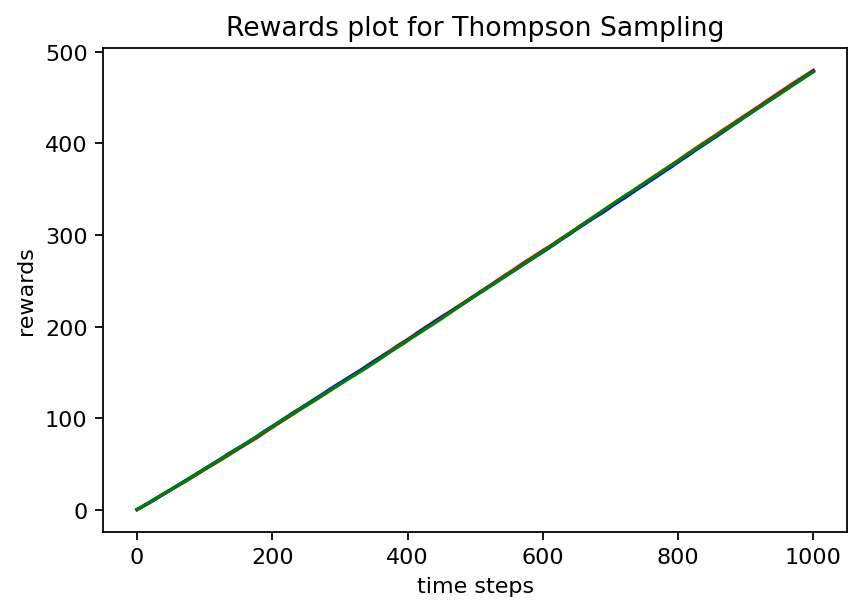

In [882]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q7_reward_avg_0, 'r')
plt.plot(t, q7_reward_avg_1, 'b')
plt.plot(t, q7_reward_avg_2, 'g')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for Thompson Sampling')
plt.show()

Percentage of Optimal Action Plot

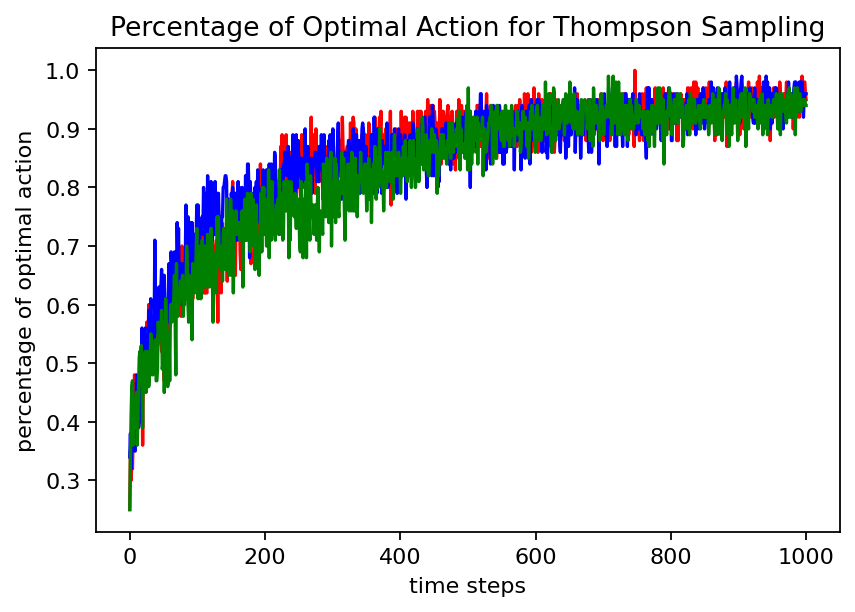

In [883]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q7_oa_0, 'r')
plt.plot(t, q7_oa_1, 'b')
plt.plot(t, q7_oa_2, 'g')
plt.xlabel('time steps')
plt.ylabel('percentage of optimal action')
plt.title('Percentage of Optimal Action for Thompson Sampling')
plt.show()

Instantaneous Regret Plot

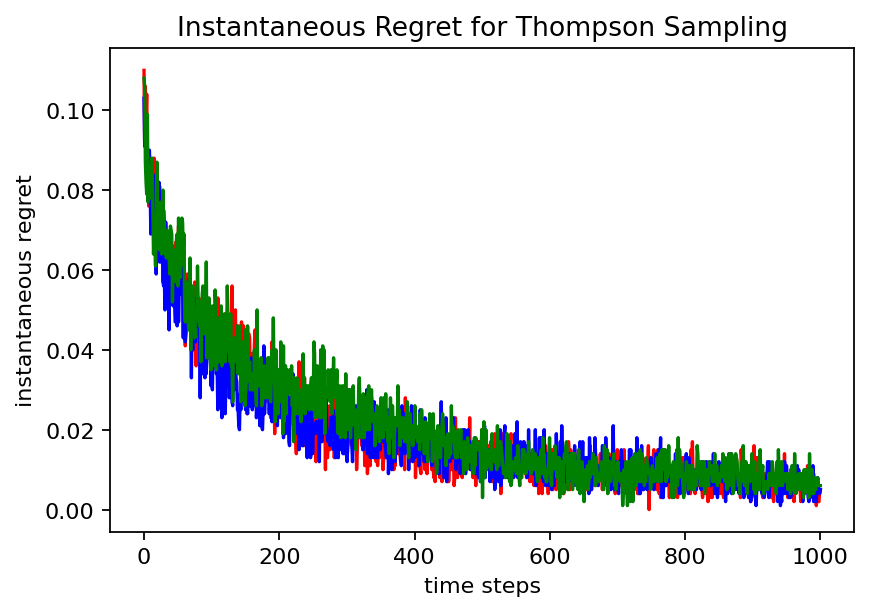

In [884]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q7_regret_0, 'r')
plt.plot(t, q7_regret_1, 'b')
plt.plot(t, q7_regret_2, 'g')
plt.xlabel('time steps')
plt.ylabel('instantaneous regret')
plt.title('Instantaneous Regret for Thompson Sampling')
plt.show()

Total Regret Plot

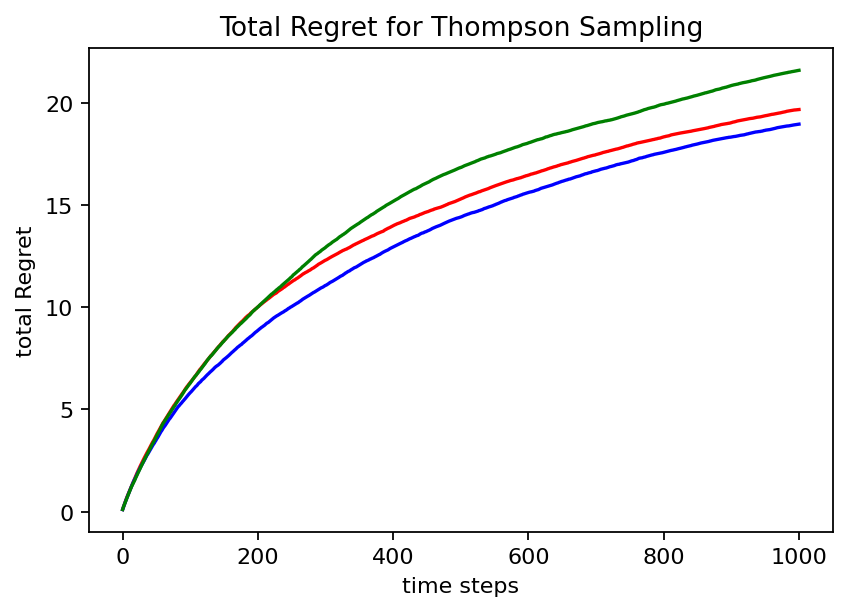

In [885]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q7_total_regret_0, 'r')
plt.plot(t, q7_total_regret_1, 'b')
plt.plot(t, q7_total_regret_2, 'g')
plt.xlabel('time steps')
plt.ylabel('total Regret')
plt.title('Total Regret for Thompson Sampling')
plt.show()

All the three lines in the reward plot, % optimal action and instantaneous regret (even with high resolution) are very clustered together. There is some difference in total difference

Standard Deviation

```
The red dot represent lower limit of standard deviation
The green dot represent upper limit of standard deviation
The blue line represent the average reward
```

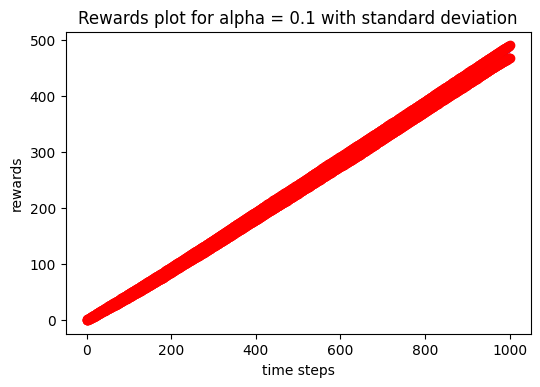

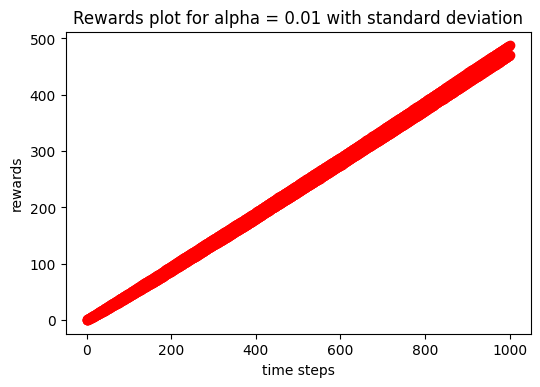

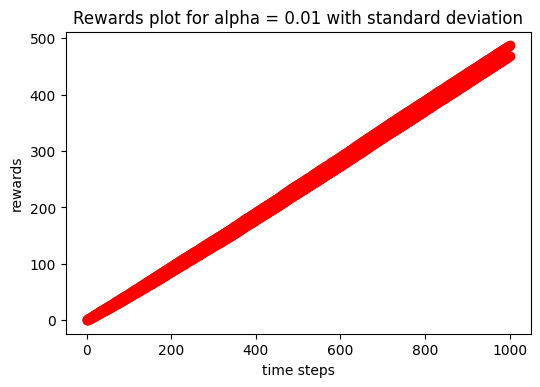

In [886]:
q7_std_0 = q4_calculate_std(q7_sample_0)
q7_std_1 = q4_calculate_std(q7_sample_1)
q7_std_2 = q4_calculate_std(q7_sample_2)


q7_lower_0, q7_upper_0 = q4_make_sd_points(q7_reward_avg_0, q7_std_0)
q7_lower_1, q7_upper_1 = q4_make_sd_points(q7_reward_avg_1, q7_std_1)
q7_lower_2, q7_upper_2 = q4_make_sd_points(q7_reward_avg_2, q7_std_2)

plt.figure(dpi=100)
plt.plot(t, q7_reward_avg_0, 'b', t, q7_lower_0, 'ro', t, q7_upper_0, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 0.1 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q7_reward_avg_1, 'b', t, q7_lower_1, 'ro', t, q7_upper_1, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 0.01 with standard deviation')
plt.show()

plt.figure(dpi=100)
plt.plot(t, q7_reward_avg_2, 'b', t, q7_lower_2, 'ro', t, q7_upper_2, 'ro')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot for alpha = 0.01 with standard deviation')
plt.show()

# **Question 8**

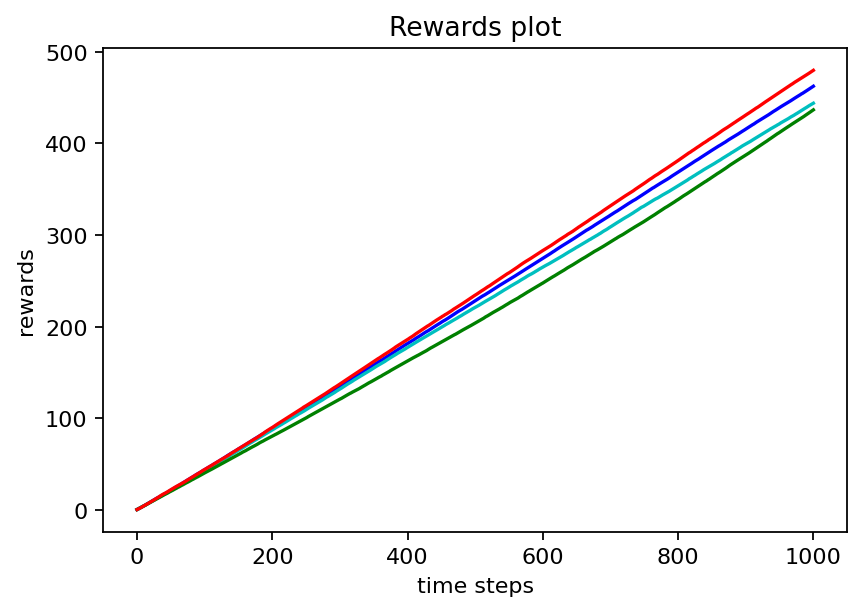

In [887]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q4_reward_avg_1, 'b')
plt.plot(t, q5_reward_avg_e8a0, 'c')
plt.plot(t, q6_reward_avg_2, 'g')
plt.plot(t, q7_reward_avg_0, 'r')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot')
plt.show()

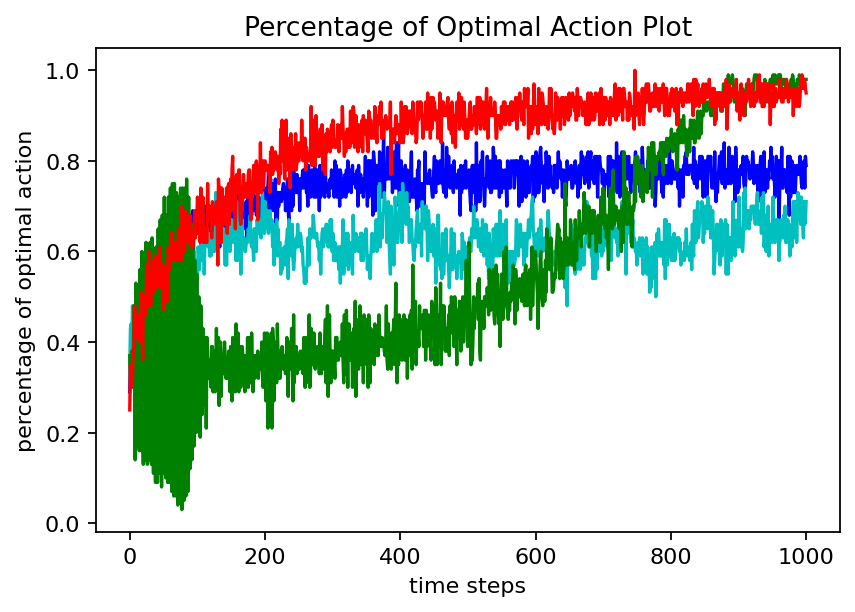

In [888]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q4_oa_1, 'b')
plt.plot(t, q5_oa_e8a0, 'c')
plt.plot(t, q6_oa_2, 'g')
plt.plot(t, q7_oa_0, 'r')
plt.xlabel('time steps')
plt.ylabel('percentage of optimal action')
plt.title('Percentage of Optimal Action Plot')
plt.show()

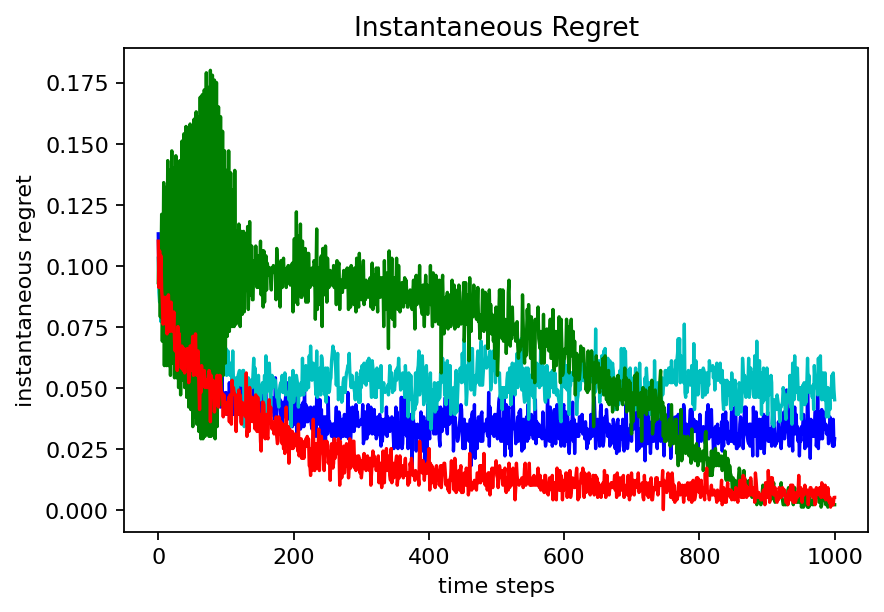

In [889]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q4_regret_1, 'b')
plt.plot(t, q5_regret_e8a0, 'c')
plt.plot(t, q6_regret_2, 'g')
plt.plot(t, q7_regret_0, 'r')
plt.xlabel('time steps')
plt.ylabel('instantaneous regret')
plt.title('Instantaneous Regret')
plt.show()

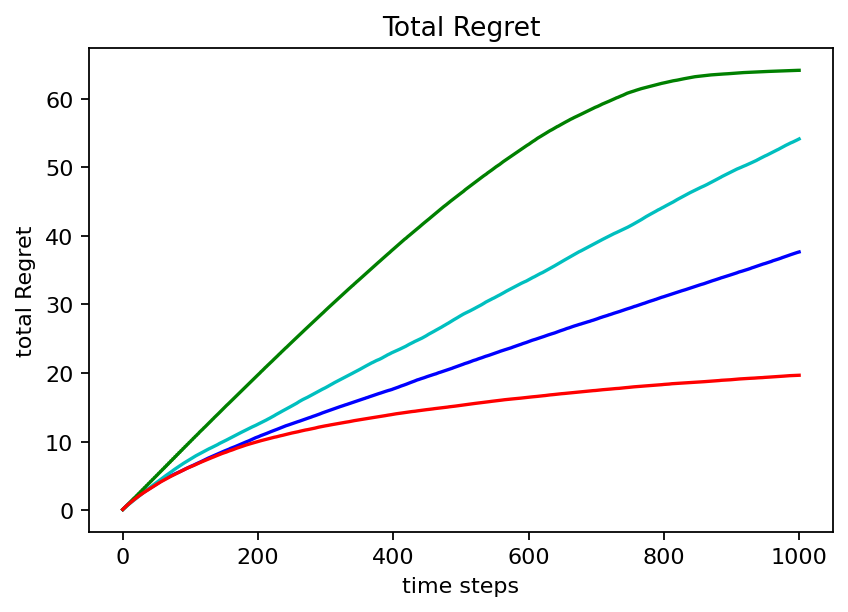

In [890]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q4_total_regret_1, 'b')
plt.plot(t, q5_total_regret_e8a0, 'c')
plt.plot(t, q6_total_regret_2, 'g')
plt.plot(t, q7_total_regret_0, 'r')
plt.xlabel('time steps')
plt.ylabel('total Regret')
plt.title('Total Regret')
plt.show()

As said earlier, greedy algorithm (question 4) performs best with epsilon = 1/8, UCB (question 6) with alpha = 0.001, and there is Thompson Sampling and for question 5 it was greedy algorithm with epsilon = 1/8 and alpha = 0.1

Thompson sampling and UCB (alpha = 0.001) seems to have outperformed the greedy algorithm.  

From Reward plot and Total regret Plot, we can see that Thomson sampling have the most rewards received and least total regret. However, if we look at % of optimal action plot and instantaneous regret, UCB seems to perform better than any other methods with most optimal action taken and least instantaneous regret during the end of the time steps. 

# **Question 9**

```
e4 -> epsilon = 1/4
e8 -> epsilon = 1/8
ucb -> UCB algorithm
thompson -> Thompson Sampling
```


Function for Greedy Algorithm



In [891]:
def q9_greedy_algo(e):
  Q = [0, 0, 0]
  N = [0, 0, 0]
  reward = []
  t_reward = 0
  for t in range(1000):
    A = choose_arm_greedy(e, Q)
    if t <= 500:
      R = bandit(A)
    else:
      R = bandit_plus_500(A)
    N[A] = N[A] + 1
    Q[A] = Q[A] + (0.1) * (R - Q[A])
    t_reward = t_reward + R
    reward.append(t_reward)
  return reward

def bandit_plus_500(arm):
  if arm == 0:
    return np.random.binomial(1, 0.5)
  elif arm == 1:
    return np.random.binomial(1, 0.6)
  else:
    return np.random.binomial(1, 0.7)

def question_9_greedy(e):
  result = []
  for i in range(1,101):
    rewards = q9_greedy_algo(e)
    result.append(rewards)  
  return result

Function for UCB

In [892]:
def q9_ucb(alpha):
  Q = [0, 0, 0]
  N = [1, 1, 1]
  reward = []
  t_reward = 0
  for t in range(1,1001):
    A = choose_arm_ucb(t, Q, N)
    if t <= 500:
      R = bandit(A)
    else:
      R = bandit_plus_500(A)
    N[A] = N[A] + 1
    Q[A] = Q[A] + (alpha) * (R - Q[A])
    t_reward = t_reward + R
    reward.append(t_reward)  
  return reward
  
def question_9_ucb(alpha):
  result = [] 
  for i in range(1,101):
    rewards = q9_ucb(alpha)
    result.append(rewards)
  return result

Function for Thompson Sampling

In [893]:
def q9_thompson(alpha):
  arm_0_beta = [1, 1]
  arm_1_beta = [1, 1]
  arm_2_beta = [1, 1]
  reward = []
  t_reward = 0
  for t in range(1000):
    A = choose_arm_thompson([arm_0_beta, arm_1_beta, arm_2_beta])

    if t <= 500:
      R = bandit(A)
    else:
      R = bandit_plus_500(A)
    
    if R == 1:
      if A == 0:
        arm_0_beta = [arm_0_beta[0] + 1, arm_0_beta[1]] 
      elif A == 1:
        arm_1_beta = [arm_1_beta[0] + 1, arm_1_beta[1]] 
      else:
        arm_2_beta = [arm_2_beta[0] + 1, arm_2_beta[1]] 
    else:
      if A == 0:
        arm_0_beta = [arm_0_beta[0], arm_0_beta[1] + 1] 
      elif A == 1:
        arm_1_beta = [arm_1_beta[0], arm_1_beta[1] + 1] 
      else:
        arm_2_beta = [arm_2_beta[0], arm_2_beta[1] + 1] 
      
    t_reward = t_reward + R
    reward.append(t_reward)
  return reward
  
def question_9_thompson(alpha):
  result = [] 
  for i in range(1,101):
    rewards = q9_thompson(alpha)
    result.append(rewards)
  return result


Dataset

In [894]:
q9_sample_greedy_e_4 = question_9_greedy(0.25)
q9_sample_greedy_e_8 = question_9_greedy(0.125)
q9_sample_ucb = question_9_ucb(0.1)
q9_sample_thompson = question_9_thompson(0.1)

Averaing over 100

In [895]:
q9_reward_avg_greedy_e4 = q4_calculate_avg(q9_sample_greedy_e_4)
q9_reward_avg_greedy_e8 = q4_calculate_avg(q9_sample_greedy_e_8)
q9_reward_avg_ucb = q4_calculate_avg(q9_sample_ucb)
q9_reward_avg_thompson = q4_calculate_avg(q9_sample_thompson)



```
The Red line represent greedy algorithm with epsilon = 1/4
The Blue line represent greedy algorithm with epsilon = 1/8
The Green line represent UCB algorithm
The Cyan line represent Thompson
```



Rewards Plot

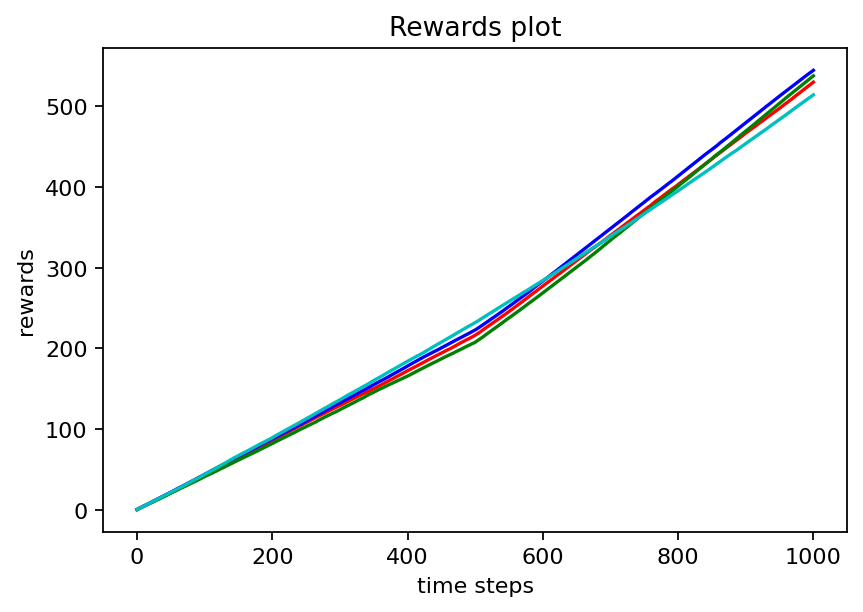

In [896]:
t = np.linspace(0, 1000, 1000)
plt.figure(dpi=160)
plt.plot(t, q9_reward_avg_greedy_e4, 'r')
plt.plot(t, q9_reward_avg_greedy_e8, 'b')
plt.plot(t, q9_reward_avg_ucb, 'g')
plt.plot(t, q9_reward_avg_thompson, 'c')
plt.xlabel('time steps')
plt.ylabel('rewards')
plt.title('Rewards plot')
plt.show()

If we just considered the rewards plot, all the four methods seem to perform very similarly. At the end Greedy algorithm with epsilon = 1/8 have received the most rewards followed by UCB, greedy with epsilon = 1/4 and Thompson sampling. Thompson sampling seems to have a straight line throughout the trial whereas the rest methods have increase in their rewards after change in action value at 500. 